<h2><center>$${\color{red}{\underline{Engineering~Internship:Part~2}}}$$</center></h2>
<h3><center>$$\large{{\color{green}{Subject:}}~\underline{Artificial~Emotional~Intelligence}}$$</center></h3>
<h3><center>$$This~work~is~done~by:~{\color{blue}{\underline{Sofien~Resifi}}}$$</center></h3>

# $\underline{Overview}$

* So after finishing the state of art, we are going to move to the implementation part where we are going to code all the theoratical aspects that we have seen in the first part.
* This notebook has three main parts $\underline{{\color{red}{Data~cleaning~and~processing}}}$, $\underline{{\color{blue}{Exploratory~data~anslysis}}}$,and $\underline{{\color{green}{Modeling}}}$, we will see these three parts in details.

$\Longrightarrow$ For the cleaning the text must be representative, in other words we need to keep only the significant words, for example in a text we need to remove all kind of ${\color{blue}{URL}}$, ${\color{blue}{emojis}}$, ${\color{blue}{poncutation}}$, ${\color{blue}{Stop words}}$(like the ,to,and...), ${\color{blue}{Hashtags}}$(in tweets for example). So there is a lot to do with the data. So once all of this is done we need to process our text which means we are going to use some technics like ${\color{green}{Stemming}}$ or  ${\color{green}{Limmatization}}$.

$\Longrightarrow$ In the ${\color{green}{E}}xploratory~{\color{green}{D}}ata~{\color{green}{A}}nalysis~({\color{green}{EDA}})$ part we are going to visualize the most common words in our data and then we will split the data into three parts : positive data, neutral data, and negative data. Then we will deal with each data apart.

$\Longrightarrow$ In the modeling part we will start by defining our metrics that we will be using for the evaluation of the model. We will start with the basic machine learning models( ${\color{red}{Logistic~regression}}$,  ${\color{red}{Naive Bayes}}$) with TFIDF and count vectors features, then we are going to move to deep leaning algorithms(we will use different algorithms like ${\color{blue}{deep~neural~network}}$, ${\color{blue}{LSTM}}$, ${\color{blue}{BILSTM}}$,  ${\color{blue}{GRU}}$). After this we will move to the most complicated part which is using a pretrained algorithm BERT

# ${\color{green}{I)}}~Load~packages$

In [1]:
import nltk
from IPython.display import clear_output  # This packages will help us to have a very clean code
nltk.download('stopwords')                # Stop words are meaningless words in a sentence
!pip install googletrans
nltk.download('punkt')
clear_output()

In [2]:
import numpy as np#This packges is very necessary for dealing with arrays
import pandas as pd#This packages is necessarry when dealing with DataFrames
import matplotlib.pyplot as plt#This packages is useful for some plots
import seaborn as sns#This package is for ploting
from tqdm import tqdm#This package show us how are loop is doing
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from keras.layers.recurrent import LSTM, GRU
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder#This package is for encoding the target
from sklearn.model_selection import StratifiedKFold, KFold
import requests, zipfile, io#This package is useful for unziping a file 
import os
import sys
import logging
import string
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer#This package
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_auc_score
from nltk import FreqDist, word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import googletrans                       #This package will be necessary for the translation
from googletrans import Translator       #This package is useful for the clearty of the code  
import re
clear_output()

# ${\color{green}{II)}}~~Load~data$

Here our data is stored in the google drive so we are going to import it.

In [3]:
train_to_clean= pd.read_csv("/content/drive/My Drive/Thisis_the_final_data.csv")
clear_output()

In [4]:
train_to_clean.head()

,Sentiment,text
0,negative,is so sad for my APL frie...
1,negative,I missed the New Moon trail...
2,positvie,omg its already 7:30 :O
3,negative,.. Omgaga. Im sooo im gunna CRy. I'...
4,negative,i think mi bf is cheating on me!!! ...


In [5]:
train_to_clean['Sentiment']=train_to_clean['Sentiment'].replace("positvie","positive")

In [6]:
#Let's suffle the data 
train_to_clean = train_to_clean.sample(frac = 1,replace=True)
train_to_clean = train_to_clean.sample(frac = 1,replace=True)

In [7]:
train_to_clean=train_to_clean.reset_index()
train_to_clean.drop('index',axis=1,inplace=True)

In the data above: -1 means that the sentiment is negative, 0 the sentiment is neutral, and 1 the sentiment is positvie.

In [8]:
#Here we are going to do some changes on the data by changing the columns name
train_to_clean['text']=train_to_clean['text'].astype(str)
train_to_clean['Sentiment']=train_to_clean['Sentiment'].astype(str)
print("train shape",train_to_clean.shape)

train shape (158989, 2)


So we can remarke that the data has a good shape 😂😂😂😂

Here we are going to split our data to a train part and a test part.

In [9]:
Train1=np.copy(train_to_clean)
test_to_clean=train_to_clean[155000:]
train_to_clean=train_to_clean[:155000]

In [10]:
test_to_clean['text']=test_to_clean['text'].astype(str)
test_to_clean['Sentiment']=test_to_clean['Sentiment'].astype(str)

# ${\color{green}{III)}}~Data~processing~\&~cleaning$

## ${\color{red}{1)}}~Data~cleaning$

### $\underline{{\color{red}{1}}-{\color{blue}{1)}}~Removing~extra~spaces~\&~ links}$

* Now let's see how we are going to remove extra spaces and links, let's an example:

so in this example we can see that there is some extra spaces and a link

In [11]:
test_links = 'Ah 😭yes the:     customer    , service emoji; https://t.co/HQjVfI1LF3'
def remove_links(text):
    text = re.sub(r'https?://\S+', '', text)  # Remove link
    url = re.compile(r'https?://\S+|www\.\S+')
    text= url.sub(r'',text)
    text = re.sub(r'\n',' ', text)              # Remove line breaks
    text = re.sub(r'“',' ', text)
    text = re.sub('\s+', ' ', text).strip()     # Remove leading, trailing, and extra spaces
    return text
print("Original text: " + test_links)
print("Cleaned text: " + remove_links(test_links))

Original text: Ah 😭yes the:     customer    , service emoji; https://t.co/HQjVfI1LF3
Cleaned text: Ah 😭yes the: customer , service emoji;


### $\underline{{\color{red}{1}}-{\color{blue}{2)}}~Dealing~with~ponctutation~\&~emoji~\&~html}$

In [12]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
print("Original text: " + test_links)
print("Cleaned text: " + remove_punct(test_links))  

Original text: Ah 😭yes the:     customer    , service emoji; https://t.co/HQjVfI1LF3
Cleaned text: Ah 😭yes the     customer     service emoji httpstcoHQjVfI1LF3


In [13]:
def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

Now for emojis let's see how can wer remove them.Let's see the example bellow

In [14]:
text_emoji='I’m convinced that 😭😭😭 is the most expressive emoji combo Sad? 😭😭😭 Extremely happy? 😭😭😭 Proud? 😭😭😭 Emotional? 😭😭😭'
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
print("Original text: " + text_emoji)
print("Cleaned text: " + remove_emoji(text_emoji))  

Original text: I’m convinced that 😭😭😭 is the most expressive emoji combo Sad? 😭😭😭 Extremely happy? 😭😭😭 Proud? 😭😭😭 Emotional? 😭😭😭
Cleaned text: I’m convinced that  is the most expressive emoji combo Sad?  Extremely happy?  Proud?  Emotional? 


### $\underline{{\color{red}{1}}-{\color{blue}{2)}}~Dealing~with~abreviattions ~\&~concatinations}🤔🤔🤔$

When people write on Twitter they usualy use abreviations, those abreviations may not help the model so we need to transofrom them.
* Here I have tried to collect the most common abreviations used in Tweets

In [15]:
abbreviations = {"$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace","aamof" : "as a matter of fact", "acct" : "account",
    "adih" : "another day in hell","afaic" : "as far as i am concerned","afaict" : "as far as i can tell","afaik" : "as far as i know","afair" : "as far as i remember","afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications","asap" : "as soon as possible","asl" : "age, sex, location","atk" : "at the keyboard","ave." : "avenue","aymm" : "are you my mother","ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business","b2c" : "business to customer","b4" : "before",
    "b4n" : "bye for now","b@u" : "back at you","bae" : "before anyone else",
    "bak" : "back at keyboard","bbbg" : "bye bye be good", "bbc" : "british broadcasting corporation","bbias" : "be back in a second","bbl" : "be back later","bbs" : "be back soon","be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers","brt" : "be right there","bsaaw" : "big smile and a wink","btw" : "by the way","bwl" : "bursting with laughter","c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency","csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae","cwot" : "complete waste of time",
    "cya" : "see you","cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [16]:
text_abrev='Iam really zzz, I think that ygtr , w8 for me Iam coming '
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text
print("Original text: " + text_abrev)
print("Cleaned text: " + convert_abbrev_in_text(text_abrev))     

Original text: Iam really zzz, I think that ygtr , w8 for me Iam coming 
Cleaned text: Iam really sleeping bored and tired , I think that you got that right , wait for me Iam coming


The same thing for contractions, they are used frequently in tweets, also we need to transform them.

In [17]:
contractions = { 
"ain`t": "am not",
"aren`t": "are not",
"can`t": "cannot",
"can`t`ve": "cannot have",
"'cause": "because",
"could`ve": "could have",
"couldn`t": "could not",
"couldn`t`ve": "could not have",
"didn`t": "did not",
"doesn`t": "does not",
"don`t": "do not",
"hadn`t": "had not",
"hadn`t`ve": "had not have",
"hasn`t": "has not",
"haven`t": "have not",
"he`d": "he would",
"he`d`ve": "he would have",
"he`ll": "he will",
"he`s": "he is",
"how`d": "how did",
"how`ll": "how will",
"how`s": "how is",
"i`d": "i would",
"i`ll": "i will",
"i`m": "i am",
"i`ve": "i have",
"isn`t": "is not",
"it`d": "it would",
"it`ll": "it will",
"it`s": "it is",
"let`s": "let us",
"ma`am": "madam",
"mayn`t": "may not",
"might`ve": "might have",
"mightn`t": "might not",
"must`ve": "must have",
"mustn`t": "must not",
"needn`t": "need not",
"oughtn`t": "ought not",
"shan`t": "shall not",
"sha`n`t": "shall not",
"she`d": "she would",
"she`ll": "she will",
"she`s": "she is",
"should`ve": "should have",
"shouldn`t": "should not",
"that`d": "that would",
"that`s": "that is",
"there`d": "there had",
"there`s": "there is",
"they`d": "they would",
"they`ll": "they will",
"they`re": "they are",
"they`ve": "they have",
"wasn`t": "was not",
"we`d": "we would",
"we`ll": "we will",
"we`re": "we are",
"we`ve": "we have",
"weren`t": "were not",
"what`ll": "what will",
"what`re": "what are",
"what`s": "what is",
"what`ve": "what have",
"where`d": "where did",
"where`s": "where is",
"who`ll": "who will",
"who`s": "who is",
"won`t": "will not",
"wouldn`t": "would not",
"you`d": "you would",
"you`ll": "you will",
"you`re": "you are",
"thx"   : "thanks"
}

In [18]:
text_concat='who`ll do the work, I wouldn`t do that, where`s he going ?'
def remove_contractions_word(chaine):
    return contractions[chaine.lower()] if chaine.lower() in contractions.keys() else chaine

def remove_contractions(text):
  word_list=[remove_contractions_word(i) for i in text.split()]
  return ' '.join([str(elem) for elem in word_list])

print("Original text: " + text_concat)
print("Cleaned text: " + remove_contractions(text_concat))     

Original text: who`ll do the work, I wouldn`t do that, where`s he going ?
Cleaned text: who will do the work, I would not do that, where is he going ?


All this functions we have seen above must be applied to the whole data. That's why we have create a function (main function) that will call all the other functions and apply. this function is called ${\color{red}{process-text}}$

In [19]:
def process_text(df):
  df['text'] = df['text'].apply(lambda x: remove_links(x))
  df['text'] = df['text'].apply(lambda x: remove_html(x))
  df['text'] = df['text'].apply(lambda x: remove_contractions(x))
  df['text'] = df['text'].apply(lambda x: convert_abbrev_in_text(x))
  df['text'] = df['text'].apply(lambda x: remove_emoji(x))
  df['text'] = df['text'].apply(lambda x: remove_punct(x))
  return df

This is the data before the cleaning.

In [20]:
train_to_clean.head(10)

,Sentiment,text
0,neutral,modi only announced that india did the asat te...
1,positive,@_Keo_ sent anyone else want some old scenar...
2,positive,@brisler27 Get 100 followers a day using www.t...
3,neutral,there nothing except modi sarkar
4,neutral,\nmodi says mission shakti threat anyone
5,negative,"@a_c81 oh, sucks. and that one's not on YT."
6,positive,#Good or #Evil? Can't wait to do both http://...
7,negative,@cassandroar parental guidance then haha so bo...
8,positive,@Coyy Yo! I'm in bed. Checking if you're around.
9,positive,@babimattivy nhaaaiiiiiiiiiii! me rendi ao twi...


In [21]:
Train= process_text(train_to_clean)
Test = process_text(test_to_clean)

This the data after the cleaning 


In [22]:
Train.head(10)

,Sentiment,text
0,neutral,modi only announced that india did the asat te...
1,positive,Keo sent anyone else want some old scenarios ...
2,positive,brisler27 Get 100 followers a day using Once ...
3,neutral,there nothing except modi sarkar
4,neutral,modi says mission shakti threat anyone
5,negative,ac81 oh sucks and that one s not on YT
6,positive,Good or Evil Ca nt wait to do both
7,negative,cassandroar parental guidance then haha so bored
8,positive,Coyy Yo I m in bed Checking if you re around
9,positive,babimattivy nhaaaiiiiiiiiiii me rendi ao twi...


## ${\color{red}{2)}}~Text~Processing$

<p align="center">
  <img width="500" height="300" src="https://miro.medium.com/max/2050/1*ES5bt7IoInIq2YioQp2zcQ.png">

### $\underline{{\color{red}{1}}-{\color{blue}{1)}}~Lemmatization}$



$\Longrightarrow$ $\underline{{\color{green}{\textbf{Lemmatization}}}}$ entails reducing the various inflected forms of a word into a single form for easy analysis.

In [23]:
nltk.download('wordnet')
clear_output()

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
sentenc='I was going to the store'
lemmatizer = WordNetLemmatizer() 
def limaSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    lima_sentence=[]
    for word in token_words:
        lima_sentence.append(lemmatizer.lemmatize(word,pos='v'))
        lima_sentence.append(" ")
    return "".join(lima_sentence)
print("Original text: " + sentenc)
print("Cleaned text: " + limaSentence(sentenc))        

Original text: I was going to the store
Cleaned text: I be go to the store 


### $\underline{{\color{red}{1}}-{\color{blue}{2)}}~Stemming}$


$\Longrightarrow$ $\underline{{\color{green}{\textbf{Stemming}}}}$ involves cutting the inflected words to their root form.

In [25]:
sent='nowadays everything have changed'
porter=PorterStemmer()
def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

print("Original text: " + sent)
print("Cleaned text: " + stemSentence(sent))       

Original text: nowadays everything have changed
Cleaned text: nowaday everyth have chang 


Now let's apply the stemming and limmatization technic to the Train data and Test data.

# $\underline{{\color{green}{IV)}}~{\color{green}{E}}xploratory~{\color{green}{D}}ata~{\color{green}{A}}nalysis~({\color{green}{EDA}})}$

## ${\color{red}{1)}}~Visualization$

### $\underline{{\color{red}{1}}-{\color{blue}{1)}}~Target~visualization}$

Now let's take look into the distribution of the target, in other words we are going to see the percentage of each category in the target.

In [26]:
Train['Sentiment']=Train['Sentiment'].astype(str)

In [27]:
Train['Sentiment']=Train['Sentiment'].replace('nan',np.NaN)
Train=Train.dropna()

In [28]:
temp = Train.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Sentiment,text
2,positive,54639
0,negative,52464
1,neutral,47897


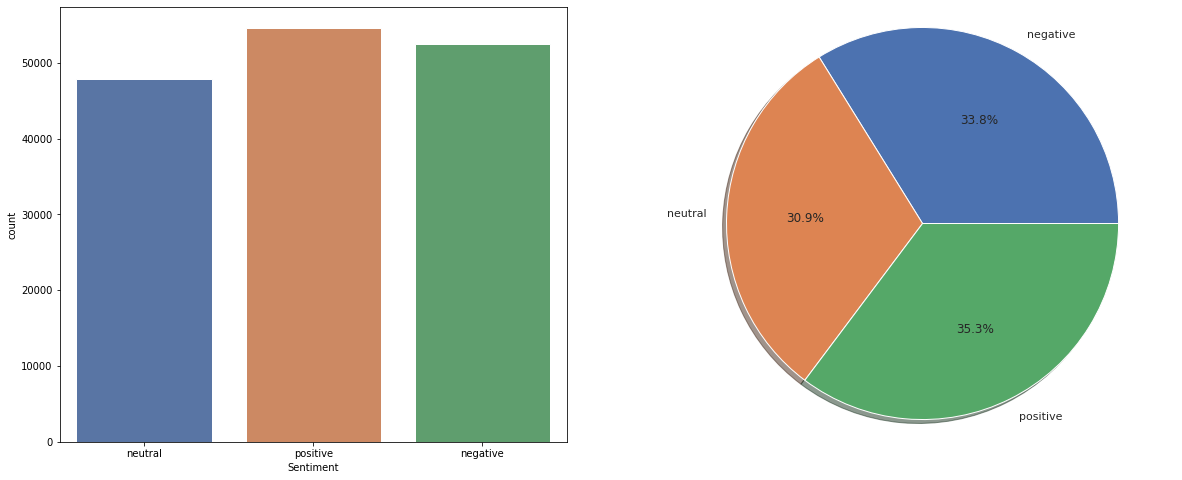

In [29]:
from plotly import graph_objs as go
plt.figure(figsize=(20,8))
plt.subplot(121)
sns.set(style="darkgrid")
sns.countplot(x='Sentiment',data=Train)
plt.subplot(122)
labels = ['negative', 'neutral', 'positive']
sizes = [Train['Sentiment'].value_counts()[1],
         Train['Sentiment'].value_counts()[2],
         Train['Sentiment'].value_counts()[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.show()

Here we can see the distribution of the classes in our data

Let's draw a Funnel-Chart for better visualization

In [30]:
fig= go.Figure(go.Funnelarea(
    text =temp.Sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

$\underline{{\color{red}{\textbf{Remarke:}}}}$So here we can see that the ruling class here is the positive with a percentage of 44.3%, we have 33.9% of our tweets are neural and the negative class is the smallest with a percentage of 21.8%.

### $\underline{{\color{red}{1}}-{\color{blue}{2)}}~Data~Analysis}$

In this part we are going to take a look on some meta features like: ${\color{green}{Number~of~characters~in~tweets}}$, ${\color{green}{number~of~words~in~a ~tweet}}$, ${\color{green}{average~lenth~of~a~tweets}}$,ect...

$\underline{{\color{blue}{\textbf{Number of characters in tweets}}}}$

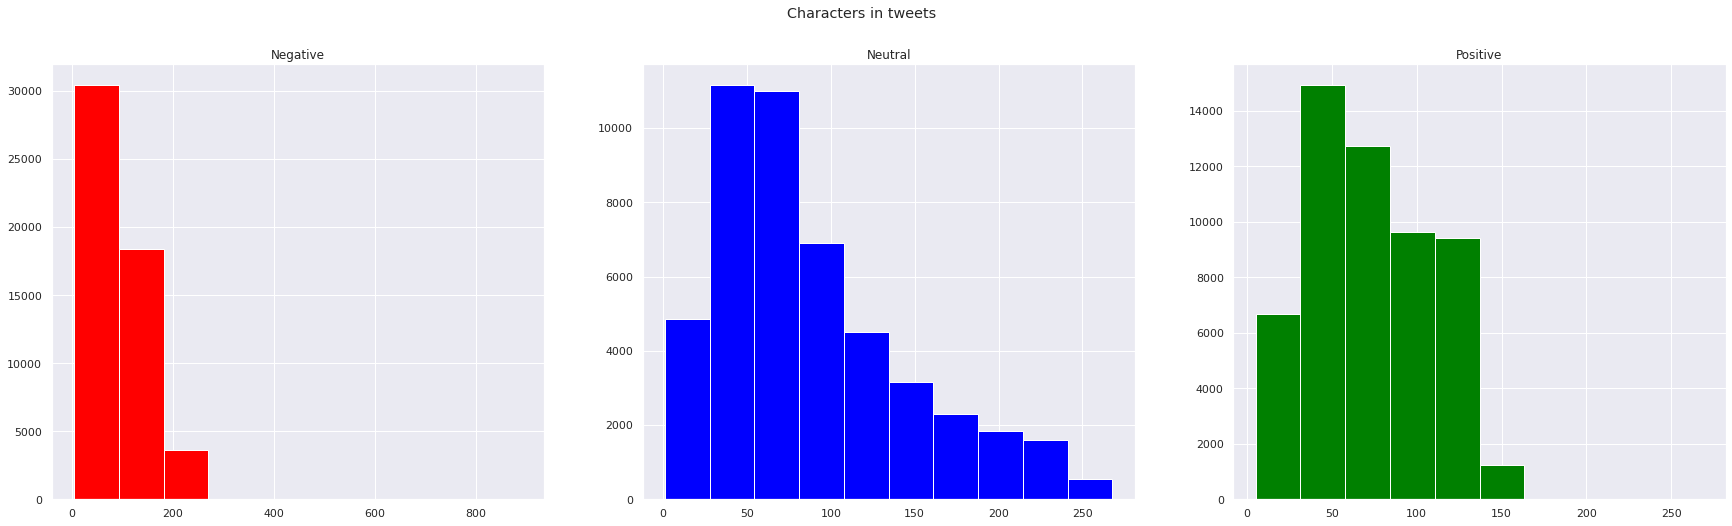

In [31]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,8))
tweet_len=Train[Train['Sentiment']=='neutral']['text'].str.len()
ax2.hist(tweet_len,color='Blue')
ax2.set_title('Neutral')
tweet_len=Train[Train['Sentiment']=='negative']['text'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('Negative')
tweet_len=Train[Train['Sentiment']=='positive']['text'].str.len()
ax3.hist(tweet_len,color='Green')
ax3.set_title('Positive')
fig.suptitle('Characters in tweets')
plt.show()

$\underline{{\color{blue}{\textbf{Number of words in tweets}}}}$

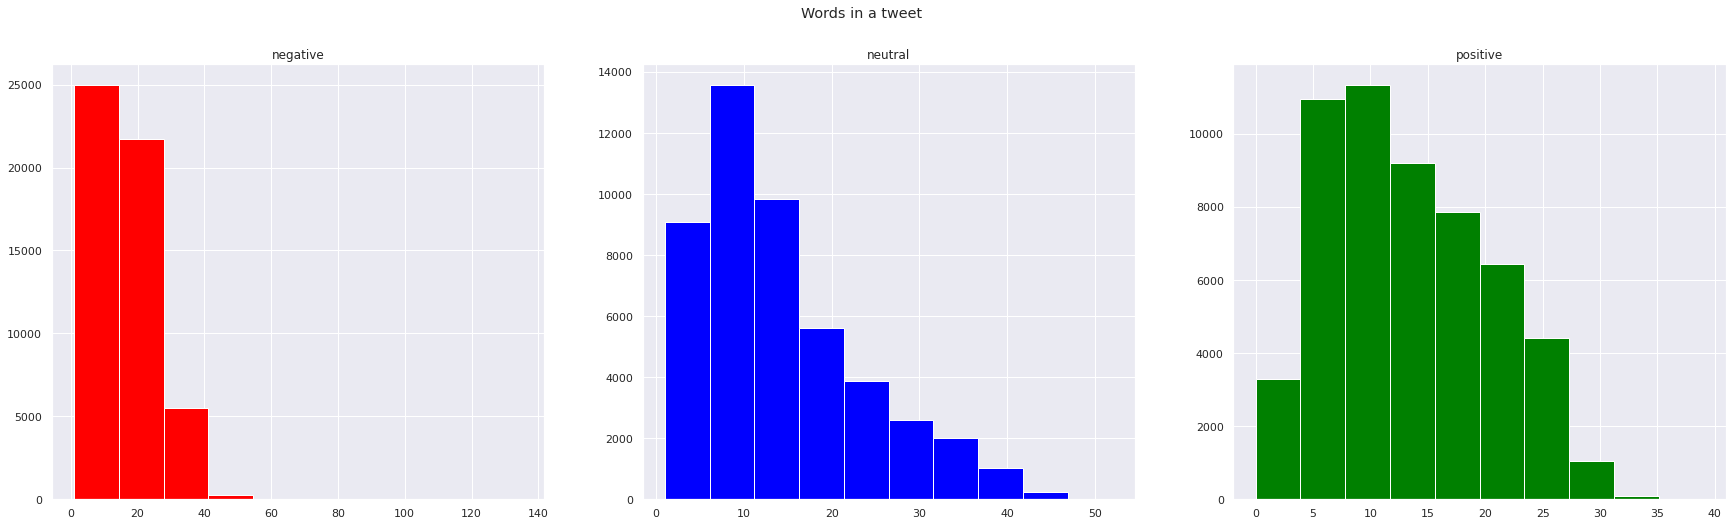

In [32]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,8))
tweet_len=Train[Train['Sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='blue')
ax2.set_title('neutral')
tweet_len=Train[Train['Sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='red')
ax1.set_title('negative')
tweet_len=Train[Train['Sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='green')
ax3.set_title('positive')
fig.suptitle('Words in a tweet')
plt.show()

$\underline{{\color{blue}{\textbf{Average word length in a tweet}}}}$

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



Text(0.5, 0.98, 'Average word length in each tweet')

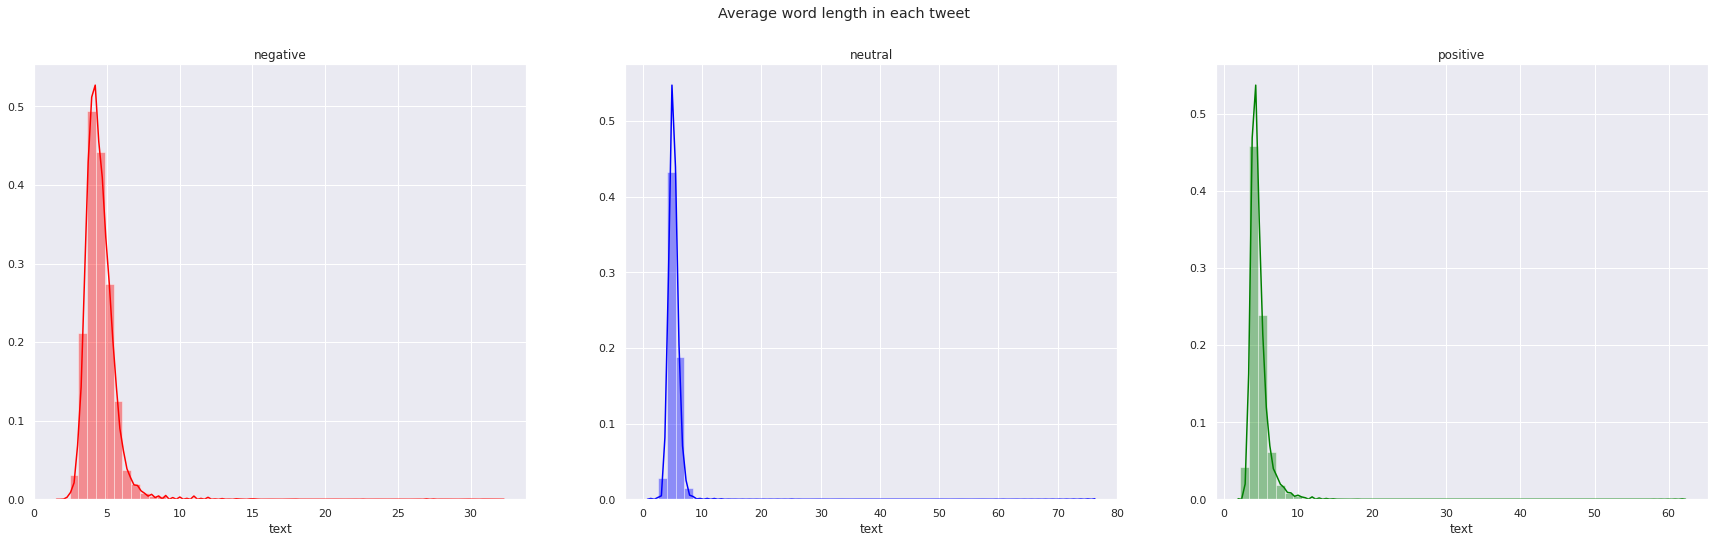

In [33]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(30,8))
word=Train[Train['Sentiment']=='negative']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('negative')
word=Train[Train['Sentiment']=='neutral']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='blue')
ax2.set_title('neutral')
word=Train[Train['Sentiment']=='positive']['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax3,color='green')
ax3.set_title('positive')
fig.suptitle('Average word length in each tweet')

$\underline{{\color{blue}{\textbf{Common stopwords in tweets}}}}$

$\underline{What~are~stop~words?~and~why~it~is~improtant~to~remove~them?}$

When working with ${\color{red}{Natural~language~processing}}$ applications, we often hear of the term ${\color{blue}{“stop~words”}}$ . Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead

In [34]:
stop_english=set(stopwords.words('english'))

Now let's see the most frequent words before removing the stop words

In [35]:
from collections import Counter
Train['temp_list'] = Train['text'].apply(lambda x:str(x).split())
Test['temp_list'] = Test['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in Train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,56533
1,modi,53133
2,I,42720
3,you,42356
4,and,33640
5,to,28676
6,for,27356
7,a,20615
8,i,19419
9,that,19344


In [36]:
import plotly.express as px
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text with stop words', orientation='h', 
             width=1000, height=1000,color='Common_words')
fig.show()

OOPS! 😯😯While we cleaned our dataset we didnt remove the stop words and hence we can see the most coomon word is 'de' . Let's try again after removing the stopwords

In [37]:
LE=stopwords.words('english')
LE.remove("not")
LE.remove("nor")

In [38]:
def remove_stopword_enli(x):
  return [y for y in x if y not in stopwords.words('english')+['modi','’','I']]
Train['temp_list'] = Train['temp_list'].apply(lambda x:remove_stopword_enli(x))   #Remvoing stop_words in Train data
Test['temp_list'] = Test['temp_list'].apply(lambda x:remove_stopword_enli(x))     #Remvoing stop_words in Test data

### $\underline{{\color{red}{1}}-{\color{blue}{3)}}~Most~frequent~words~and~bigrams}$

Here we are going to see the most frequent words in the whole data.
Bigrams are the most frequent sequences of two words

In [39]:
top = Counter([item for sublist in Train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,like,9078
2,india,7567
3,get,6423
4,know,6244
5,one,5768
6,people,5314
7,laughing,5262
8,loud,5154
9,good,4796
10,time,4784


In [40]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

So now let's see the most frequent words in each class.

In [41]:
def join_text(lis):
  return ' '.join([str(elem) for elem in lis])
Train['text']=Train['temp_list'].apply(join_text)  
#Train['text']=Train['text'].apply(lambda x:stemSentence(x))
#Test['text']=Test['text'].apply(lambda x:stemSentence(x))

Train['text']=Train['text'].apply(lambda x:limaSentence(x))
Test['text']=Test['text'].apply(lambda x:limaSentence(x))

In [42]:
Positive_sent = Train[Train['Sentiment']=='positive']
Negative_sent = Train[Train['Sentiment']=='negative']
Neutral_sent = Train[Train['Sentiment']=='neutral']

### $\underline{{\color{red}{1}}-{\color{blue}{3}}-{\color{green}{1)}}~Positive~class}$

In [43]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(14))
temp_positive.head()
temp_positive.columns = ['Common_words','count']

In [44]:
temp_positive['Common_words']

0           nt
1         good
2     laughing
3         loud
4         like
5         love
6          get
7         know
8       thanks
9          You
10         one
11         day
12         see
13       think
Name: Common_words, dtype: object

In [45]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=1000, height=500,color='Common_words')
fig.show()

Now let's see the N-grams, in other words the most frequent sequences

In [46]:
def get_top_tweet_rgrams(corpus,r, n=None):
    vec = CountVectorizer(ngram_range=(r, r)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

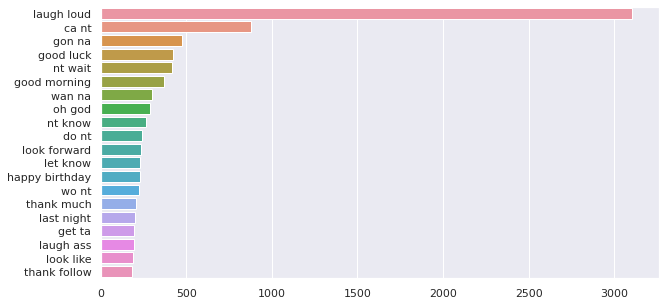

In [47]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_rgrams(Positive_sent['text'],2)[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Quadrgrams')

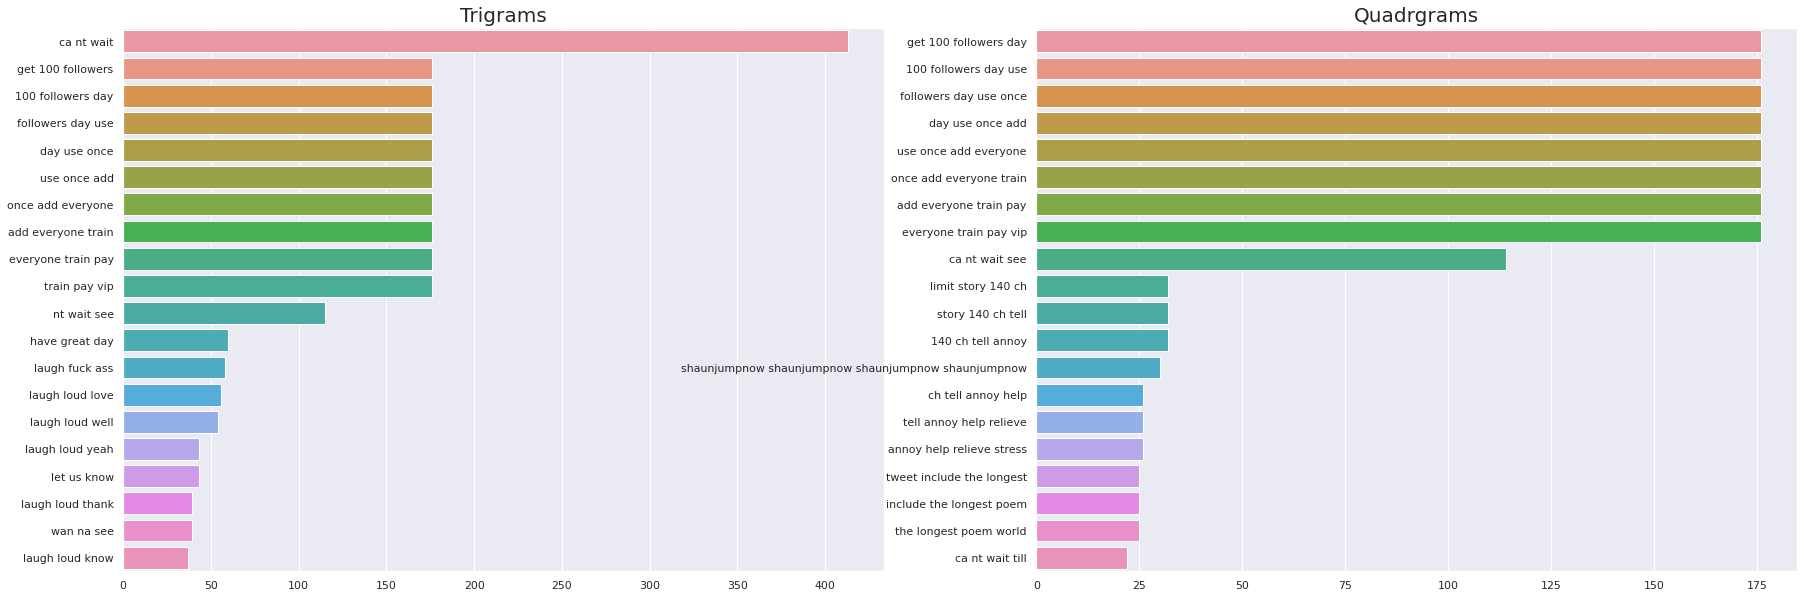

In [48]:
plt.figure(figsize=(30,10))
plt.subplot(121)
top_tweet_trigrams=get_top_tweet_rgrams(Positive_sent['text'],3)[:20]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)
plt.title("Trigrams",fontsize=20)
plt.subplot(122)
top_tweet_quadrgrams=get_top_tweet_rgrams(Positive_sent['text'],4)[:20]
x,y=map(list,zip(*top_tweet_quadrgrams))
sns.barplot(x=y,y=x)
plt.title("Quadrgrams",fontsize=20)

### $\underline{{\color{red}{1}}-{\color{blue}{3}}-{\color{green}{2)}}~negative~class}$

In [49]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(30))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']

In [50]:
temp_negative['Common_words']

1         like
2          get
3         know
4          one
5     laughing
6         loud
7       people
8           go
9         time
10         got
11        work
12        want
13       india
14       sorry
15        poor
16        miss
17         see
18       think
19       going
20       still
21        good
22         day
23      really
24        back
25       would
26      though
27        dont
28          ca
29          im
Name: Common_words, dtype: object

In [51]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon negative Words', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

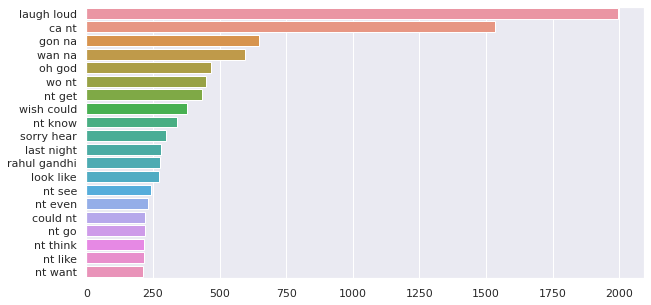

In [52]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_rgrams(Negative_sent['text'],2)[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Quadrgrams')

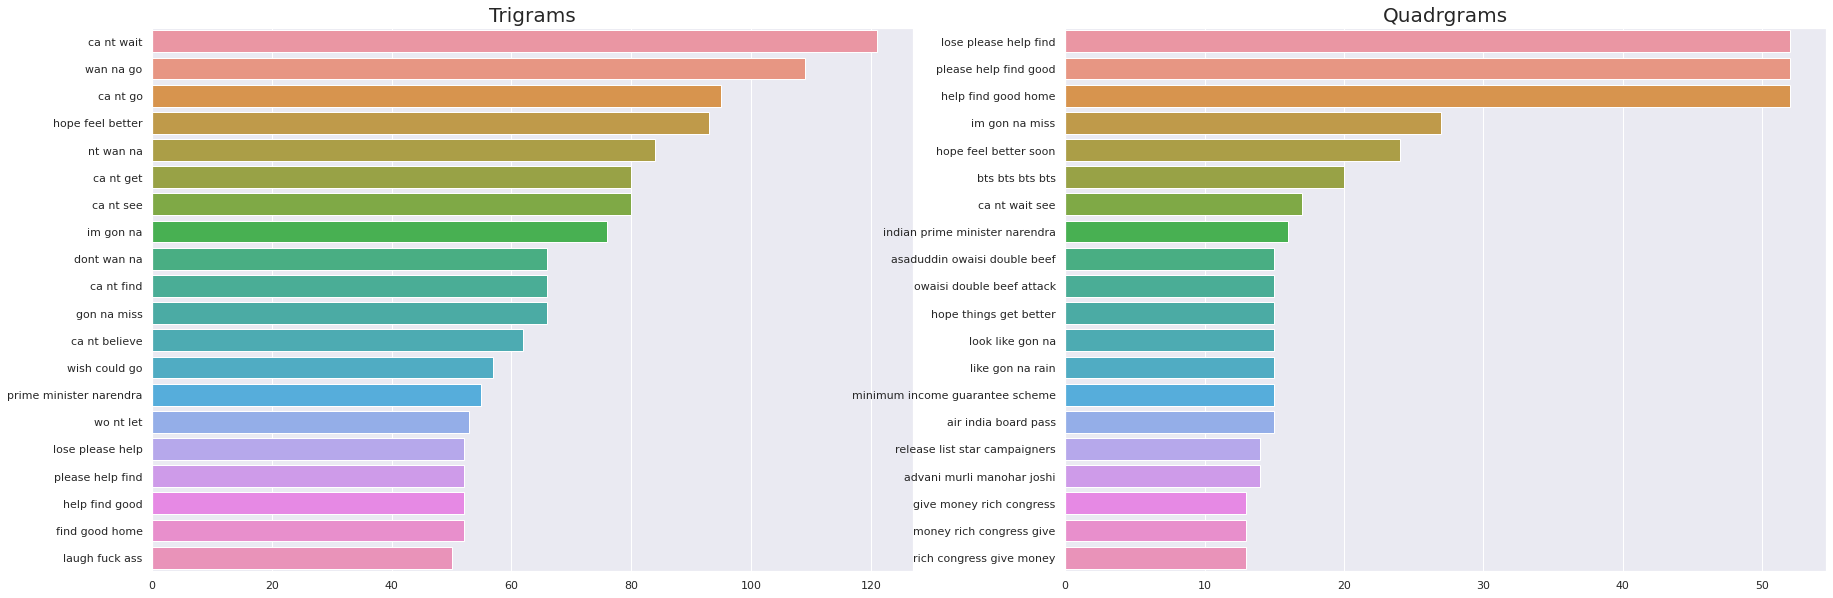

In [53]:
plt.figure(figsize=(30,10))
plt.subplot(121)
top_tweet_trigrams=get_top_tweet_rgrams(Negative_sent['text'],3)[:20]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)
plt.title("Trigrams",fontsize=20)
plt.subplot(122)
top_tweet_quadrgrams=get_top_tweet_rgrams(Negative_sent['text'],4)[:20]
x,y=map(list,zip(*top_tweet_quadrgrams))
sns.barplot(x=y,y=x)
plt.title("Quadrgrams",fontsize=20)

### $\underline{{\color{red}{1}}-{\color{blue}{3}}-{\color{green}{3)}}~neutral~class}$

In [54]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(15))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']

In [55]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon negative Words', orientation='h', 
             width=1000, height=500,color='Common_words')
fig.show()

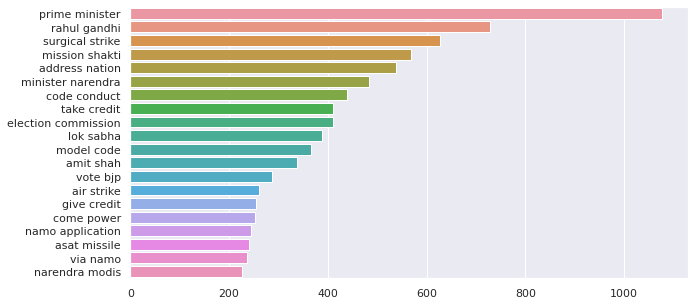

In [56]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_rgrams(Neutral_sent['text'],2)[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

Text(0.5, 1.0, 'Quadrgrams')

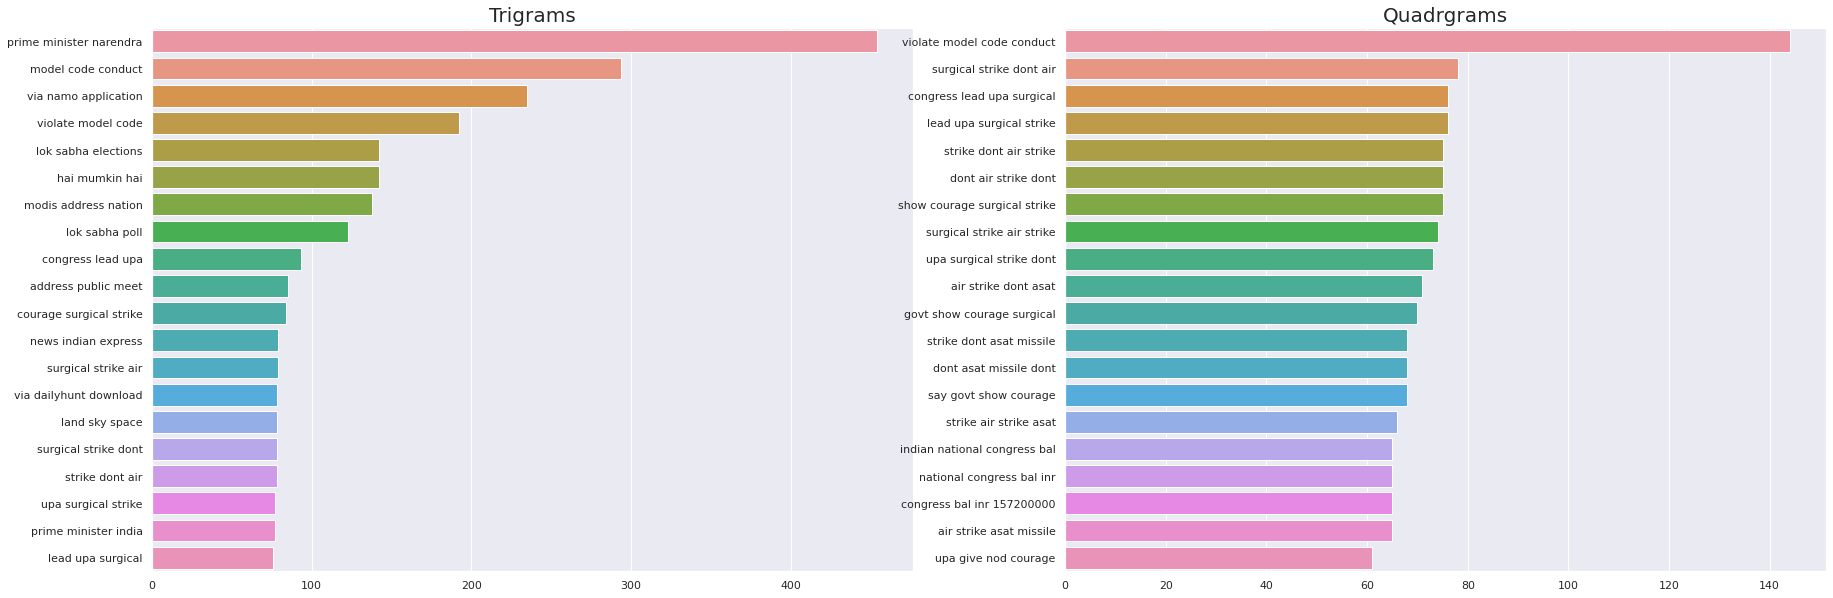

In [57]:
plt.figure(figsize=(30,10))
plt.subplot(121)
top_tweet_trigrams=get_top_tweet_rgrams(Neutral_sent['text'],3)[:20]
x,y=map(list,zip(*top_tweet_trigrams))
sns.barplot(x=y,y=x)
plt.title("Trigrams",fontsize=20)
plt.subplot(122)
top_tweet_quadrgrams=get_top_tweet_rgrams(Neutral_sent['text'],4)[:20]
x,y=map(list,zip(*top_tweet_quadrgrams))
sns.barplot(x=y,y=x)
plt.title("Quadrgrams",fontsize=20)

In [58]:
Train.drop('temp_list',axis=1,inplace=True)
Test.drop('temp_list',axis=1,inplace=True)

# $\underline{{\color{green}{{\color{green}{V)}}}}~~Modeling}$

Before starting modeling we need to define our metrics for the evalutation of our models:We will use ${\color{red}{F1\_score}}$ and ${\color{red}{accuracy}}$.
<p align="center">
  <img width="500" height="200" src="https://www.researchgate.net/profile/Alaa_Tharwat/publication/327148996/figure/fig2/AS:700752393670660@1544083798963/An-illustrative-example-of-the-confusion-matrix-for-a-multi-class-classification-test.png">


* $\underline{{\color{blue}{\large \textbf{F1_score}}}}$:
<h3><center>$$F1\_score=2* \frac{Precision*Recall}{precision+Recall}$$</center></h3>
<h2><center>$$where$$</center></h2>
<h2><center>$$Precision=\frac{TP_A}{TP_A+E_{BA}+E_{CA}}$$</center></h2>
<h2><center>$$Recall=\frac{TP_A}{TP_A+E_{AB}+E_{AC}}$$</center></h2>

* $\underline{{\color{blue}{\large \textbf{Accuarcy}}}}$:

<h2><center>$$Accuracy=\frac{TP_A+TP_B+TP_C}{TP_A+TP_B+TP_C+E_{AB}+E_{AC} + E_{BA}+E_{CA}+E_{CB}+E_{BC}}$$</center></h2>

* $\underline{{\color{blue}{\large \textbf{roc_auc_score}}}}$:


In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. It is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics)




## $\underline{{\color{red}{1)}}~Modeling~with~machine~learning}$ 

In [59]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    clear_output()
    return -1.0 / rows * vsota

In [60]:
lbl_enc_train = preprocessing.LabelEncoder() #Label encoding for the target.
lbl_enc_test = preprocessing.LabelEncoder()
y_train= lbl_enc_train.fit_transform(Train['Sentiment'].values)
y_test= lbl_enc_test.fit_transform(Test['Sentiment'].values)

In [61]:
Test['Sentiment'].value_counts()

positive    1396
negative    1358
neutral     1235
Name: Sentiment, dtype: int64

In [62]:
xtrain, xvalid, ytrain, yvalid = train_test_split(Train.text.values, y_train,                                #Here we are going to split our data to a train part and a validation part
                                                  stratify=y_train, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

### $\underline{{\color{red}{1}}-{\color{blue}{1)}}~Logistic~regression~with~TF-IDF}$

Let's start building our very first model.

Our very first model is a simple TF-IDF (Term Frequency - Inverse Document Frequency) followed by a simple Logistic Regression.

In [63]:
# Always start with these features. They work (almost) everytime!
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,stop_words='english')

# Fitting TF-IDF to both training and test sets (semi-supervised learning)
tfv.fit(list(xtrain))
xtrain_tfv = tfv.transform(xtrain) 
xvalid_tfv = tfv.transform(xvalid)
xtest_tfv  = tfv.transform(Test['text'].values)

${\color{blue}{\large \textbf{Training the model}}}$

In [64]:
# Fitting a simple Logistic Regression on TFIDF
clf_LR_tfv= LogisticRegression(C=1.0)
clf_LR_tfv.fit(xtrain_tfv, ytrain)
clear_output()

${\color{blue}{\large \textbf{Evaluation}}}$

In [65]:
predictions_train = clf_LR_tfv.predict_proba(xtrain_tfv)
pred_train=[list(predictions_train[i,:]).index(max(predictions_train[i,:])) for i in range(len(predictions_train))]
print("Train errors")
print ("f_1_score: %0.3f " % f1_score(ytrain, np.array(pred_train),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(ytrain, np.array(pred_train)))

Train errors
f_1_score: 0.936 
accuracy: 0.936 


In [66]:
print("validation errors")
predictions_val = clf_LR_tfv.predict_proba(xvalid_tfv)
pred_val=[list(predictions_val[i,:]).index(max(predictions_val[i,:])) for i in range(len(predictions_val))]
print ("f_1_score: %0.3f " % f1_score(yvalid, np.array(pred_val),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(yvalid, np.array(pred_val)))

validation errors
f_1_score: 0.882 
accuracy: 0.883 


In [67]:
print("test errors")
predictions_test = clf_LR_tfv.predict_proba(xtest_tfv)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.8860478537549525
accuracy: 0.885 


In [68]:
y_test

array([0, 0, 2, ..., 0, 1, 0])

In [69]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.87      0.81      0.84      1358
     neutral       0.93      0.96      0.95      1235
    positive       0.86      0.89      0.87      1396

    accuracy                           0.88      3989
   macro avg       0.89      0.89      0.89      3989
weighted avg       0.88      0.88      0.88      3989



And there we go. We have our first model with a multiclass logloss of 0.626.

But we are greedy and want a better score. Lets look at the same model with a different data.

Instead of using TF-IDF, we can also use word counts as features. This can be done easily using CountVectorizer from scikit-learn.

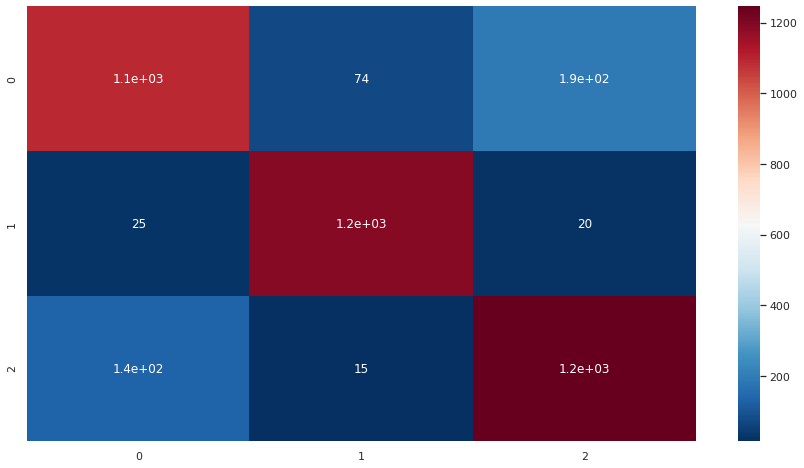

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="RdBu_r")

### $\underline{{\color{red}{1}}-{\color{blue}{2)}}~Logistic~regression~with~Count~vectors}$

In [71]:
ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3))

# Fitting Count Vectorizer to both training and test sets (semi-supervised learning)
ctv.fit(list(xtrain) + list(xvalid))
xtrain_ctv =  ctv.transform(xtrain) 
xvalid_ctv =  ctv.transform(xvalid)
xtest_ctv  =  ctv.transform(Test['text'].values)

${\color{blue}{\large \textbf{Training the model}}}$

In [72]:
# Fitting a simple Logistic Regression on Counts
clf_LR_ctv = LogisticRegression(C=1.0)
clf_LR_ctv.fit(xtrain_ctv, ytrain)
clear_output()

${\color{blue}{\large \textbf{Evaluation}}}$

In [73]:
predictions_train = clf_LR_ctv.predict_proba(xtrain_ctv)
pred_train=[list(predictions_train[i,:]).index(max(predictions_train[i,:])) for i in range(len(predictions_train))]
print("Train errors")
print ("f_1_score: %0.3f " % f1_score(ytrain, np.array(pred_train),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(ytrain, np.array(pred_train)))

Train errors
f_1_score: 0.997 
accuracy: 0.997 


In [74]:
print("validation errors")
predictions_val = clf_LR_ctv.predict_proba(xvalid_ctv)
pred_val=[list(predictions_val[i,:]).index(max(predictions_val[i,:])) for i in range(len(predictions_val))]
print ("f_1_score: %0.3f " % f1_score(yvalid, np.array(pred_val),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(yvalid, np.array(pred_val)))

validation errors
f_1_score: 0.947 
accuracy: 0.947 


In [75]:
print("test errors")
predictions_test = clf_LR_ctv.predict_proba(xtest_ctv)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.7197060986297744
accuracy: 0.737 


In [76]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.68      0.77      0.72      1358
     neutral       0.98      0.46      0.62      1235
    positive       0.71      0.96      0.81      1396

    accuracy                           0.74      3989
   macro avg       0.79      0.73      0.72      3989
weighted avg       0.78      0.74      0.72      3989



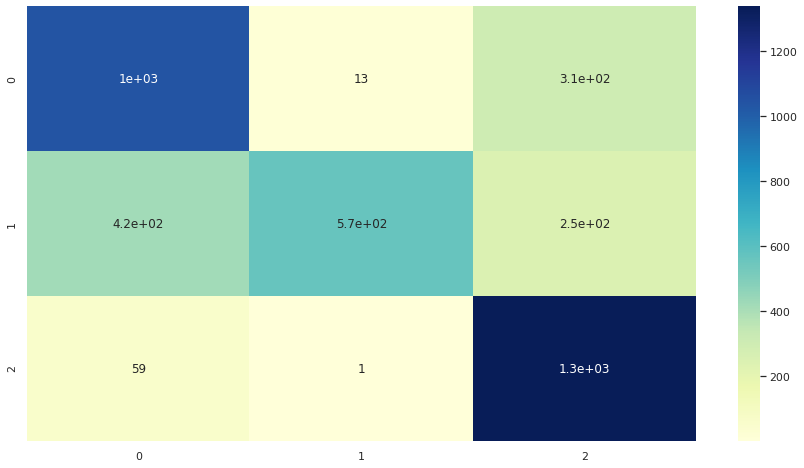

In [77]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="YlGnBu")

### $\underline{{\color{red}{1}}-{\color{blue}{3)}}~Naive~Bayes~with~TF-IDF}$

Next, let's try a very simple model which was quite famous in ancient times - Naive Bayes.

Let's see what happens when we use naive bayes on these two datasets:

${\color{blue}{\large \textbf{Training the model}}}$

In [78]:
# Fitting a simple Naive Bayes on TFIDF
clf_nb_tfv = MultinomialNB()
clf_nb_tfv.fit(xtrain_tfv, ytrain)
clear_output()

${\color{blue}{\large \textbf{Evaluation}}}$

In [79]:
predictions_train = clf_nb_tfv.predict_proba(xtrain_tfv)
pred_train=[list(predictions_train[i,:]).index(max(predictions_train[i,:])) for i in range(len(predictions_train))]
print("Train errors")
print ("f_1_score: %0.3f " % f1_score(ytrain, np.array(pred_train),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(ytrain, np.array(pred_train)))

Train errors
f_1_score: 0.917 
accuracy: 0.917 


In [80]:
print("validation errors")
predictions_val = clf_nb_tfv.predict_proba(xvalid_tfv)
pred_val=[list(predictions_val[i,:]).index(max(predictions_val[i,:])) for i in range(len(predictions_val))]
print ("f_1_score: %0.3f " % f1_score(yvalid, np.array(pred_val),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(yvalid, np.array(pred_val)))

validation errors
f_1_score: 0.859 
accuracy: 0.860 


In [81]:
print("test errors")
predictions_test = clf_nb_tfv.predict_proba(xtest_tfv)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.8635666912091083
accuracy: 0.864 


In [82]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.86      0.74      0.79      1358
     neutral       0.91      0.97      0.94      1235
    positive       0.83      0.89      0.86      1396

    accuracy                           0.86      3989
   macro avg       0.86      0.87      0.86      3989
weighted avg       0.86      0.86      0.86      3989



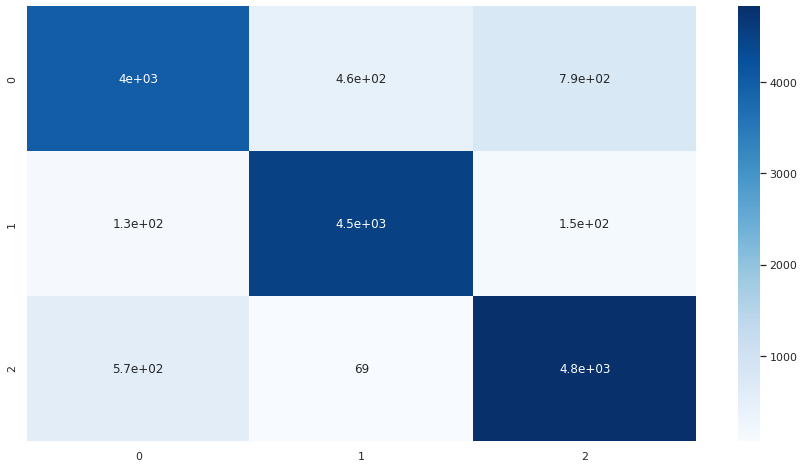

In [83]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(yvalid, pred_val)), annot=True,cmap="Blues")

### $\underline{{\color{red}{1}}-{\color{blue}{4)}}~Naive~Bayes~with~Count~vectors}$

${\color{blue}{\large \textbf{Training the model}}}$

In [84]:
# Fitting a simple Naive Bayes on Counts
clf_nb_ctv = MultinomialNB()
clf_nb_ctv.fit(xtrain_ctv, ytrain)
clear_output()

${\color{blue}{\large \textbf{Evaluation}}}$

In [85]:
predictions_train = clf_nb_ctv.predict_proba(xtrain_ctv)
pred_train=[list(predictions_train[i,:]).index(max(predictions_train[i,:])) for i in range(len(predictions_train))]
print("Train errors")
print ("f_1_score: %0.3f " % f1_score(ytrain, np.array(pred_train),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(ytrain, np.array(pred_train)))

Train errors
f_1_score: 0.987 
accuracy: 0.987 


In [86]:
print("validation errors")
predictions_val = clf_nb_ctv.predict_proba(xvalid_ctv)
pred_val=[list(predictions_val[i,:]).index(max(predictions_val[i,:])) for i in range(len(predictions_val))]
print ("f_1_score: %0.3f " % f1_score(yvalid, np.array(pred_val),average='weighted'))
print ("accuracy: %0.3f " % accuracy_score(yvalid, np.array(pred_val)))

validation errors
f_1_score: 0.934 
accuracy: 0.934 


In [87]:
print("test errors")
predictions_test = clf_nb_ctv.predict_proba(xtest_ctv)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.7633357679471873
accuracy: 0.774 


In [88]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.68      0.80      0.73      1358
     neutral       0.99      0.53      0.69      1235
    positive       0.78      0.96      0.86      1396

    accuracy                           0.77      3989
   macro avg       0.82      0.77      0.76      3989
weighted avg       0.81      0.77      0.77      3989



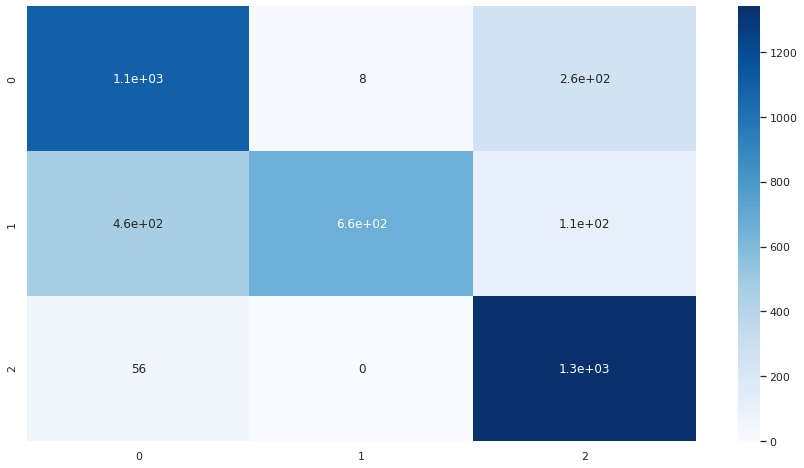

In [89]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="Blues")

## $\underline{{\color{red}{2)}}~word~embedding~\&~visualizatiion}$ 

### $\underline{{\color{red}{2}}-{\color{blue}{1)}}~Embedding~uploading~\$~Embedding~matrix}$

In [90]:
#Downloading glove from the internet
"""r= requests.get("http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))           
z.extractall()"""

'r= requests.get("http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip")\nz = zipfile.ZipFile(io.BytesIO(r.content))           \nz.extractall()'

In [91]:
#if you have the glove in your drive
z = zipfile.ZipFile('/content/drive/My Drive/glove.42B.300d.zip')           
z.extractall()

In [92]:
embeddings_index = {}
f = open('/content/glove.42B.300d.txt')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

1917494it [02:10, 14663.46it/s]

Found 1917494 word vectors.


In [93]:
stop_words=stop_english

In [94]:
# this function creates a normalized vector for the whole sentence
def sent2vec(s):
    words = str(s).lower()#.decode('utf-8')
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(embeddings_index[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    if type(v) != np.ndarray:
        return np.zeros(300)
    return v / np.sqrt((v ** 2).sum())

In [95]:
# create sentence vectors using the above function for training and validation set
xtrain_glove = [sent2vec(x) for x in tqdm(xtrain)]
xvalid_glove = [sent2vec(x) for x in tqdm(xvalid)]
xtest_glove = [sent2vec(x) for x in tqdm(Test['text'].values)]
clear_output()

### $\underline{{\color{red}{2}}-{\color{blue}{2)}}~Visualization~of~the~embeddings}$

In [96]:
L_word=['king','queen','apple','orange','man','woman','paris','london','rome','italy','cat','dog','fish']
vec=[]
for L in L_word:
  vec.append(embeddings_index[L])

In [97]:
visual=pd.DataFrame(vec)
visual['index']=L_word
visual=visual.set_index("index")
visual.head(13)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
king,-0.273810,0.267520,0.011490,-0.15876,-0.068417,0.610860,-1.7651,-0.551610,-0.577230,-0.027816,0.004539,0.424030,0.007669,0.416750,0.151340,-0.119860,-0.570900,-0.768310,0.043965,0.221380,0.507820,0.080745,0.105300,-0.154780,0.301120,-0.504750,-0.414130,0.478060,0.147080,0.037711,0.012259,-0.587320,-0.172540,-0.488540,0.208830,-0.23158,0.004080,0.078209,-0.127260,0.001608,...,0.555130,-0.618270,0.035242,0.581170,-0.364060,-0.006458,0.691530,0.038572,-0.513090,0.238570,0.394140,0.090986,-0.541260,-0.601920,0.385950,-0.194930,-0.084160,0.099663,0.286690,-0.030549,0.320920,0.091292,0.53197,-0.032932,-0.42013,-0.205020,-0.109580,0.189890,0.511660,0.566040,-0.248360,-0.009654,-0.436400,0.540470,-0.135080,-0.419680,-0.395770,0.150260,0.227710,0.054080
queen,-0.024756,0.210980,-0.273910,0.11676,0.342070,0.596740,-1.6625,-0.712360,-0.389820,0.211350,0.128480,-0.104750,0.195680,0.474130,-0.648120,-0.443010,-0.197710,-0.597090,-0.497720,0.385930,0.708250,-0.168810,0.311160,0.133430,0.239990,-0.307820,-0.337700,0.443520,-0.124640,0.233170,-0.321640,-0.799690,0.189640,-0.504270,0.297680,-0.29106,0.474860,0.159520,0.136720,0.005568,...,0.593340,-0.266840,0.211490,0.370630,-0.019727,-0.000707,0.668300,0.029587,-0.416900,-0.119470,0.031522,0.068129,-0.835990,-0.328610,0.544270,-0.220000,0.031119,0.119850,0.329690,-0.006250,0.653290,0.143610,0.58712,-0.292190,-0.29141,0.297790,0.278750,0.101270,-0.102250,0.222910,-0.165920,0.471920,-0.392140,0.604340,0.272000,-0.467200,-0.205810,-0.244580,-0.025090,-0.161660
apple,-0.077424,-0.007271,-0.171810,0.18994,0.714720,-1.050100,-2.8027,0.260800,0.260970,-1.295900,0.138800,0.144090,1.171300,0.048965,0.138930,0.647790,-0.338430,-0.958070,-0.408560,-0.214190,-0.016075,-0.076561,0.331220,0.337470,0.088585,-0.224730,0.306960,0.212830,-0.044287,0.276820,0.344830,0.177440,0.255150,-0.123660,0.330490,0.49068,-0.170670,0.375460,0.215350,0.355610,...,0.323790,-0.653550,0.111960,-0.603320,0.193900,0.160440,-0.395250,-0.096692,-0.530080,0.075331,0.127160,-0.494030,-0.014889,-0.255210,-0.000645,-0.140930,-0.600870,0.123960,-0.295850,-0.142670,-0.889620,-0.378360,-0.25774,0.051438,0.35959,-0.047132,-0.330180,-0.482190,-0.485020,-0.040666,-0.364820,-0.413160,0.703530,-0.039699,0.660040,0.046771,0.231730,-0.325390,0.029753,0.030694
orange,-0.242260,-0.418930,0.119380,-0.16961,0.606770,-0.584950,-1.3963,-0.043142,0.042301,-0.388540,0.541420,-0.071188,0.496750,0.095824,0.275450,-0.054611,0.055323,0.117380,-0.495000,-0.136400,-0.275790,0.046271,0.481610,0.008873,0.452720,0.083029,-0.109460,0.145380,0.157690,-0.403890,0.611540,0.149300,-0.359210,0.009182,0.829730,0.32319,0.298840,0.293260,0.396010,-0.422610,...,-0.302920,-0.280470,-0.200290,-0.356050,-0.005294,0.905250,-0.621960,-0.179430,-0.244080,-0.694210,-0.286920,0.356890,0.049450,-0.093454,-0.551360,-0.354820,0.037776,0.150040,-0.283470,0.098917,0.318280,0.002860,0.21509,-0.253610,0.24360,0.388390,-0.184320,0.024364,-0.057839,0.499280,-0.475890,-0.356420,0.353720,-0.390000,0.275520,0.319040,-0.244580,-0.541210,-0.217520,-0.125850
man,-0.319970,0.425390,0.317830,0.27231,-0.272720,0.065664,-2.8732,0.028408,-0.234790,-0.816900,0.021721,-0.262590,-0.261840,0.256010,0.155100,0.126060,-0.214510,-0.506790,-0.070301,0.299210,0.147900,-0.315580,-0.115350,0.088366,0.046137,0.237990,-0.291700,-0.105620,0.101990,0.167310,-0.031972,0.467970,0.254630,-0.076973,0.088044,0.31461,-0.145860,0.661130,-0.000166,0.036624,...,0.150480,-0.390740,-0.059641,0.149630,-0.290860,0.631120,0.453080,-0.190720,-0.128480,0.123350,0.183120,-0.384170,-0.352840,0.216080,-0.440210,0.111640,0.112870,0.137620,0.070855,0.324440,1.185400,-0.4451

In [98]:
pca = PCA(n_components=2)
pca.fit(visual.values)
PCA(n_components=2)
pca_components = pca.components_
pricipal_component = visual.values.dot(pca_components.T)
pricipal_component = pd.DataFrame(columns=["PC1", "PC2"], 
                              index=visual.index,
                              data=pricipal_component)
pricipal_component.head(13)

,PC1,PC2
index,,
king,-0.049290,-2.781379
queen,0.437208,-2.413125
apple,-1.906697,4.717273
orange,-1.340193,2.356192
man,-1.445944,-2.778436
woman,-1.459123,-2.702865
paris,3.351367,-0.233844
london,2.517758,-0.920776
rome,4.247908,-0.687383


In [99]:
pricipal_component['word']=L_word
pricipal_component=pricipal_component.set_index("word")
pricipal_component.head()

,PC1,PC2
word,,
king,-0.049290,-2.781379
queen,0.437208,-2.413125
apple,-1.906697,4.717273
orange,-1.340193,2.356192
man,-1.445944,-2.778436


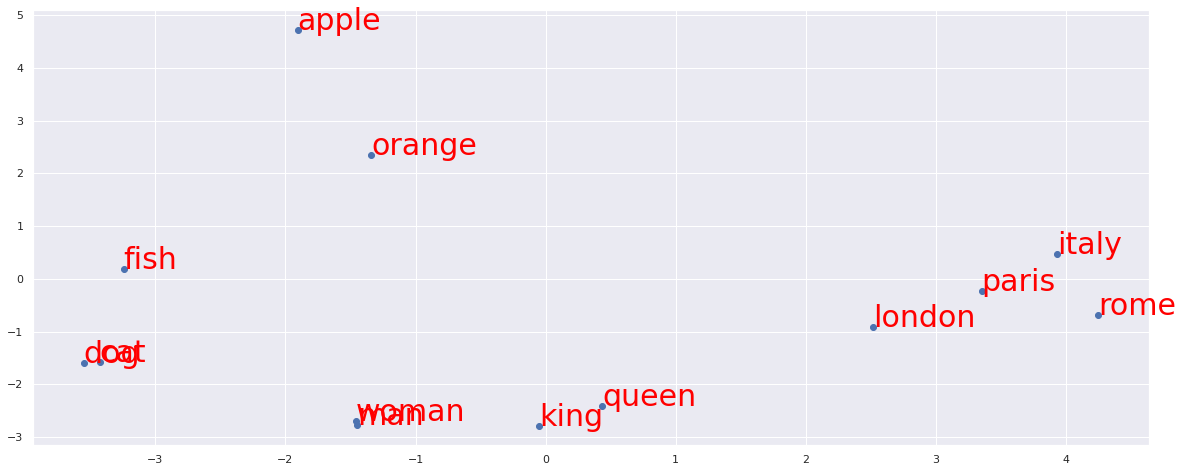

In [100]:
fig, ax = plt.subplots(figsize=(20,8))
ax.scatter(pricipal_component['PC1'], pricipal_component['PC2'])
for i, txt in enumerate(pricipal_component.index):
    ax.annotate(txt, (pricipal_component['PC1'][i], pricipal_component['PC2'][i]),fontsize=30,color='red')

## $\underline{{\color{red}{3)}}~Deep~Learning}$
But this is an era of deep learning! We cant live without training a few neural networks. Here, we will train LSTM and a simple dense network on the GloVe features. Let's start with the dense network first:

In [101]:
scl = preprocessing.StandardScaler()
xtrain_glove_scl = scl.fit_transform(xtrain_glove)
xvalid_glove_scl = scl.transform(xvalid_glove)
xtest_glove_scl = scl.transform(xtest_glove)

In [102]:
# we need to binarize the labels for the neural net
ytrain_enc = np_utils.to_categorical(ytrain)
yvalid_enc = np_utils.to_categorical(yvalid)

In [103]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 100

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)
xtest_seq=  token.texts_to_sequences(Test['text'].values)

# zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)
xtest_pad  = sequence.pad_sequences(xtest_seq, maxlen=max_len)
word_index = token.word_index

In [104]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 82033/82033 [00:00<00:00, 650798.56it/s]


In [105]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### $\underline{{\color{red}{2}}-{\color{blue}{1)}}~Simple~neural~network}$

In [106]:
# create a simple 3 layer sequential neural net
from tensorflow.keras import layers
model_nn = Sequential()
model_nn.add(Dense(300, input_dim=300, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(BatchNormalization())
model_nn.add(Dense(300, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(BatchNormalization())
model_nn.add(Dense(3))
model_nn.add(Activation('softmax'))
# compile the model
model_nn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m,recall_m])

$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [107]:
history_nn=model_nn.fit(xtrain_glove_scl, y=ytrain_enc, batch_size=512, 
          epochs=10, verbose=1, 
          validation_data=(xvalid_glove_scl, yvalid_enc))

Epoch 1/10
273/273 [==============================] - 1s 5ms/step - loss: 0.7228 - acc: 0.6737 - f1_m: 0.6622 - precision_m: 0.7000 - recall_m: 0.6285 - val_loss: 0.5718 - val_acc: 0.7394 - val_f1_m: 0.7339 - val_precision_m: 0.7655 - val_recall_m: 0.7048
Epoch 2/10
273/273 [==============================] - 1s 4ms/step - loss: 0.6006 - acc: 0.7247 - f1_m: 0.7173 - precision_m: 0.7476 - recall_m: 0.6895 - val_loss: 0.5447 - val_acc: 0.7498 - val_f1_m: 0.7462 - val_precision_m: 0.7737 - val_recall_m: 0.7206
Epoch 3/10
273/273 [==============================] - 1s 4ms/step - loss: 0.5703 - acc: 0.7394 - f1_m: 0.7343 - precision_m: 0.7604 - recall_m: 0.7099 - val_loss: 0.5237 - val_acc: 0.7599 - val_f1_m: 0.7574 - val_precision_m: 0.7814 - val_recall_m: 0.7350
Epoch 4/10
273/273 [==============================] - 1s 4ms/step - loss: 0.5469 - acc: 0.7521 - f1_m: 0.7475 - precision_m: 0.7706 - recall_m: 0.7258 - val_loss: 0.5043 - val_acc: 0.7693 - val_f1_m: 0.7666 - val_precision_m: 0.7897

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


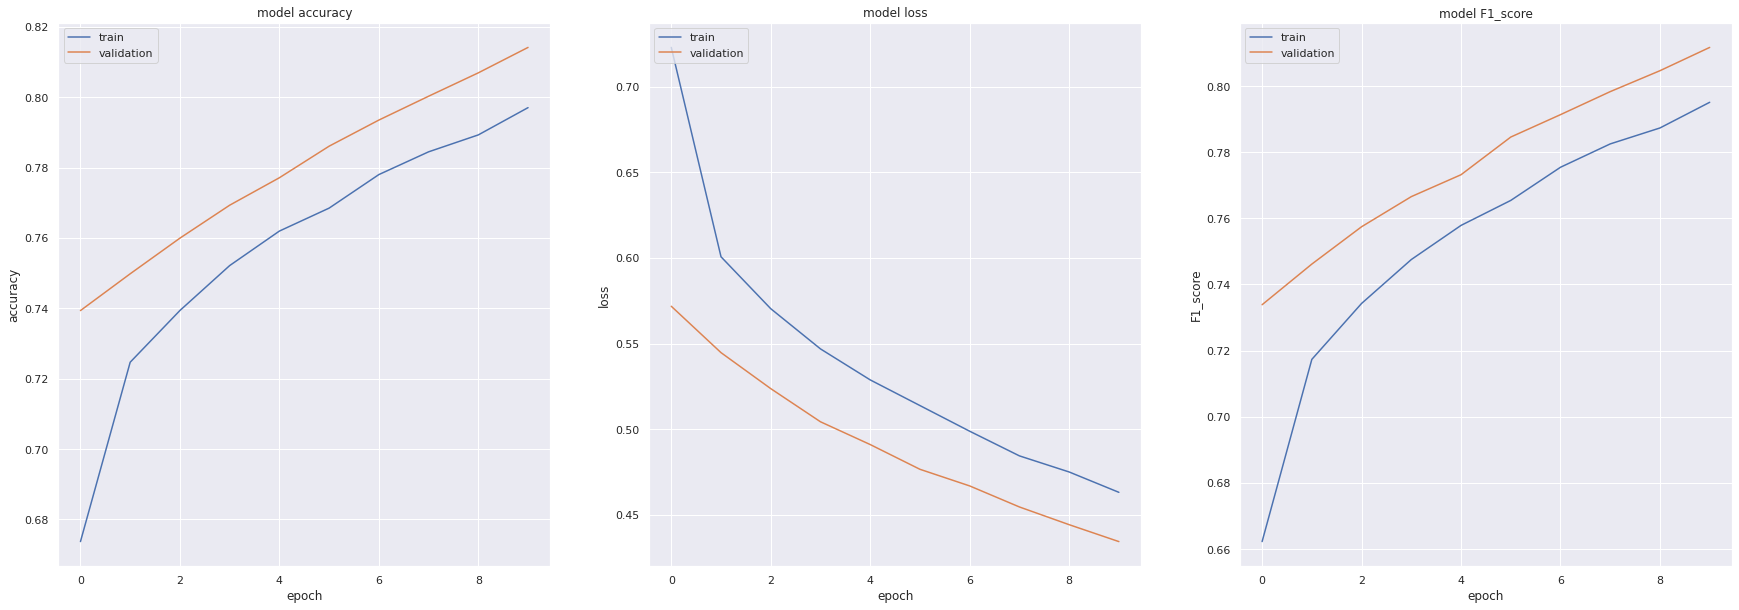

In [108]:
# list all data in history
plt.figure(figsize=(30,10))
print(history_nn.history.keys())
# summarize history for accuracy
plt.subplot(131)
plt.plot(history_nn.history['acc'])
plt.plot(history_nn.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(132)
plt.plot(history_nn.history['loss'])
plt.plot(history_nn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(133)
plt.plot(history_nn.history["f1_m"])
plt.plot(history_nn.history["val_f1_m"])
plt.title('model F1_score')
plt.ylabel('F1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

$\underline{{\color{blue}{\large \textbf{Evaluation}}}}$

In [109]:
from sklearn.metrics import accuracy_score
print("test errors")
predictions_test = model_nn.predict(xtest_glove_scl)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.8215849959279969
accuracy: 0.823 


In [110]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.81      0.66      0.73      1358
     neutral       0.88      0.97      0.92      1235
    positive       0.77      0.85      0.81      1396

    accuracy                           0.82      3989
   macro avg       0.82      0.83      0.82      3989
weighted avg       0.82      0.82      0.82      3989



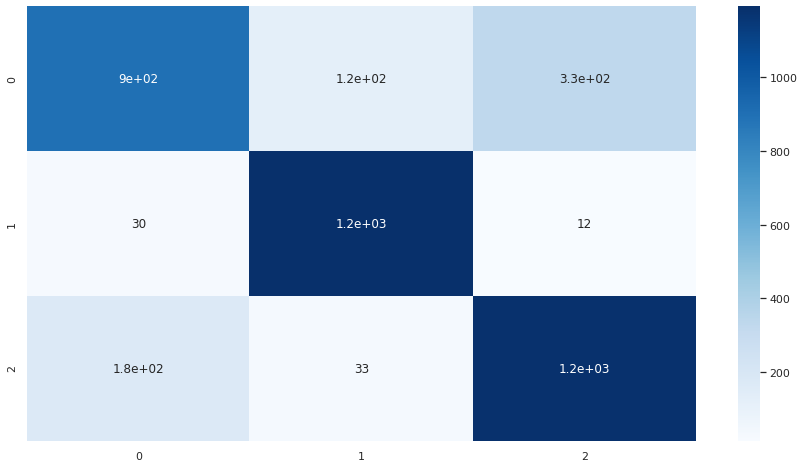

In [111]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="Blues")

### $\underline{{\color{red}{2}}-{\color{blue}{2)}}~LSTM}$

here we are going to try a sequence model LSTM with an input embedding layer

In [112]:
# A simple LSTM with glove embeddings and two dense layers
model_lstm = Sequential()
model_lstm.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=True,mask_zero=True))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(200, dropout=0.3, recurrent_dropout=0.3))

model_lstm.add(Dense(1024, activation='relu'))
model_lstm.add(Dropout(0.8))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(1024, activation='relu'))
model_lstm.add(Dropout(0.8))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(1024, activation='relu'))
model_lstm.add(Dropout(0.8))
model_lstm.add(BatchNormalization())

model_lstm.add(Dense(3))
model_lstm.add(Activation('softmax'))
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m,recall_m])


$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [113]:
history_lstm=model_lstm.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=10, verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/10
273/273 [==============================] - 131s 480ms/step - loss: 0.7929 - acc: 0.6287 - f1_m: 0.6094 - precision_m: 0.6585 - recall_m: 0.5677 - val_loss: 0.4825 - val_acc: 0.7907 - val_f1_m: 0.7868 - val_precision_m: 0.8078 - val_recall_m: 0.7668
Epoch 2/10
273/273 [==============================] - 130s 475ms/step - loss: 0.4528 - acc: 0.8076 - f1_m: 0.8053 - precision_m: 0.8192 - recall_m: 0.7919 - val_loss: 0.3124 - val_acc: 0.8723 - val_f1_m: 0.8719 - val_precision_m: 0.8754 - val_recall_m: 0.8685
Epoch 3/10
273/273 [==============================] - 130s 475ms/step - loss: 0.2649 - acc: 0.9031 - f1_m: 0.9031 - precision_m: 0.9067 - recall_m: 0.8996 - val_loss: 0.2355 - val_acc: 0.9119 - val_f1_m: 0.9119 - val_precision_m: 0.9139 - val_recall_m: 0.9100
Epoch 4/10
273/273 [==============================] - 128s 471ms/step - loss: 0.1787 - acc: 0.9376 - f1_m: 0.9376 - precision_m: 0.9394 - recall_m: 0.9359 - val_loss: 0.2093 - val_acc: 0.9255 - val_f1_m: 0.9253 - val_pre

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


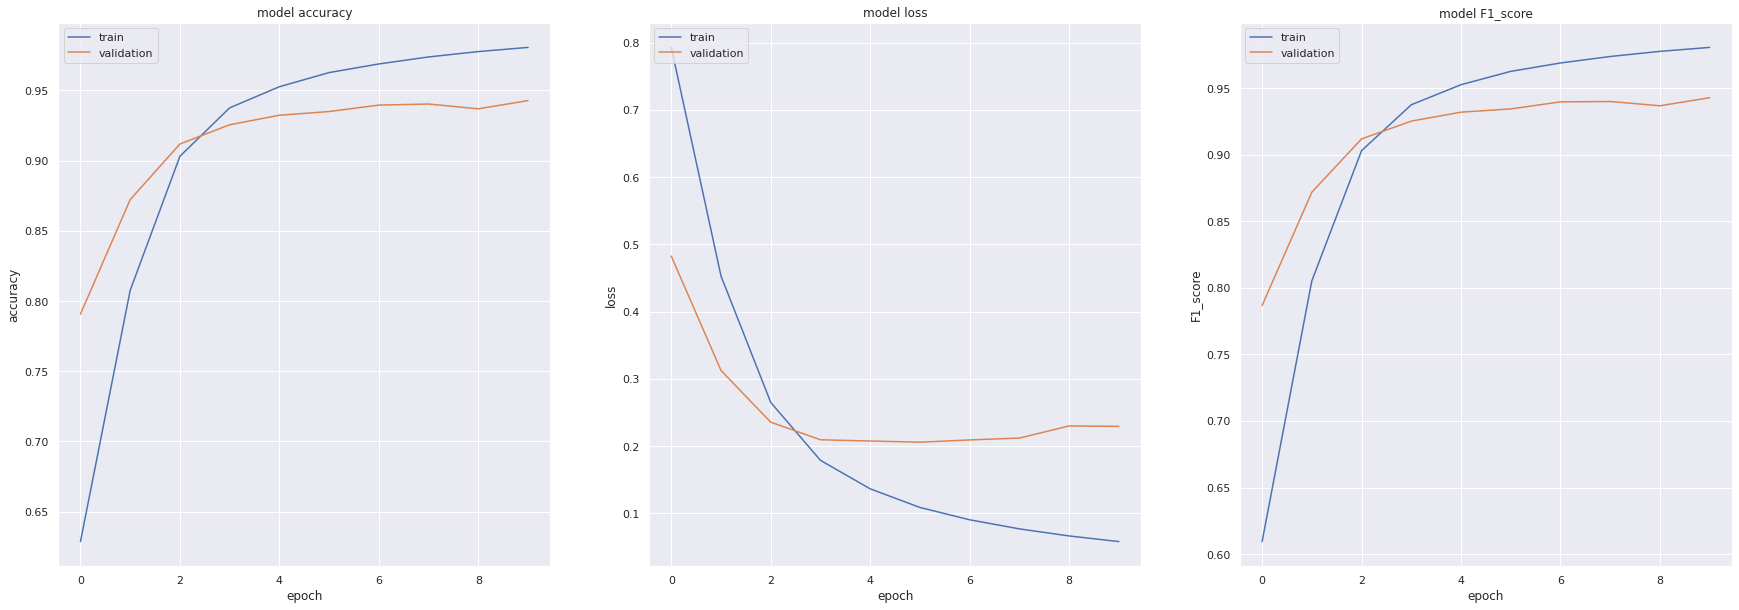

In [114]:
# list all data in history
plt.figure(figsize=(30,10))
print(history_lstm.history.keys())
# summarize history for accuracy
plt.subplot(131)
plt.plot(history_lstm.history['acc'])
plt.plot(history_lstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(132)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(133)
plt.plot(history_lstm.history["f1_m"])
plt.plot(history_lstm.history["val_f1_m"])
plt.title('model F1_score')
plt.ylabel('F1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

$\underline{{\color{blue}{\large \textbf{Evaluation}}}}$

In [115]:
print("test errors")
predictions_test = model_lstm.predict(xtest_pad)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.7288831900677007
accuracy: 0.756 


In [116]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.63      0.91      0.75      1358
     neutral       0.99      0.39      0.56      1235
    positive       0.84      0.93      0.88      1396

    accuracy                           0.76      3989
   macro avg       0.82      0.74      0.73      3989
weighted avg       0.82      0.76      0.74      3989



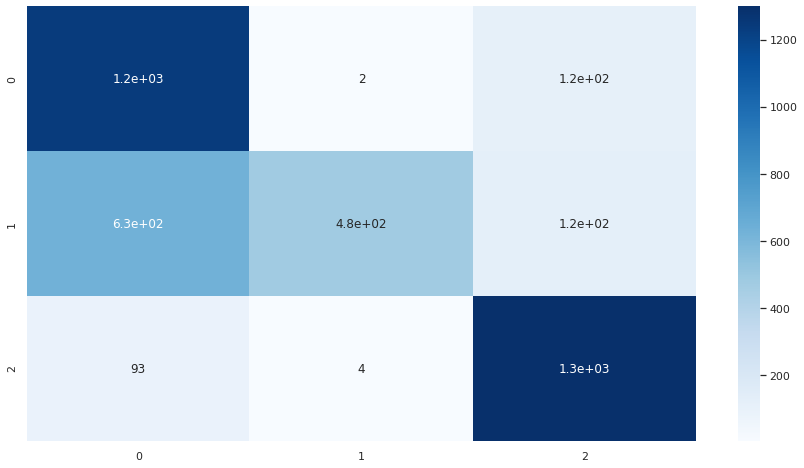

In [117]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="Blues")

### $\underline{{\color{red}{2}}-{\color{blue}{3)}}~Bidirectional~LSTM}$

Let's see if Bi-directional LSTM can give us better results. Its a piece of cake to do it with Keras :)

In [118]:
# A simple bidirectional LSTM with glove embeddings and two dense layers
model_bilstm = Sequential()
model_bilstm.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model_bilstm.add(SpatialDropout1D(0.3))
model_bilstm.add(Bidirectional(LSTM(300, dropout=0.3, recurrent_dropout=0.3)))

model_bilstm.add(Dense(1024, activation='relu'))
model_bilstm.add(Dropout(0.8))

model_bilstm.add(Dense(1024, activation='relu'))
model_bilstm.add(Dropout(0.8))

model_bilstm.add(Dense(3))
model_bilstm.add(Activation('softmax'))
model_bilstm.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m,recall_m])
clear_output()

$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [119]:
# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history_bilstm=model_bilstm.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=10, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/10
273/273 [==============================] - 147s 537ms/step - loss: 0.6914 - acc: 0.6699 - f1_m: 0.6436 - precision_m: 0.7096 - recall_m: 0.5948 - val_loss: 0.5590 - val_acc: 0.7388 - val_f1_m: 0.7273 - val_precision_m: 0.7726 - val_recall_m: 0.6872
Epoch 2/10
273/273 [==============================] - 147s 537ms/step - loss: 0.5977 - acc: 0.7216 - f1_m: 0.7125 - precision_m: 0.7545 - recall_m: 0.6750 - val_loss: 0.5179 - val_acc: 0.7687 - val_f1_m: 0.7555 - val_precision_m: 0.8033 - val_recall_m: 0.7131
Epoch 3/10
273/273 [==============================] - 147s 539ms/step - loss: 0.5531 - acc: 0.7446 - f1_m: 0.7382 - precision_m: 0.7723 - recall_m: 0.7071 - val_loss: 0.4759 - val_acc: 0.7823 - val_f1_m: 0.7779 - val_precision_m: 0.8106 - val_recall_m: 0.7478
Epoch 4/10
273/273 [==============================] - 144s 529ms/step - loss: 0.5214 - acc: 0.7629 - f1_m: 0.7582 - precision_m: 0.7862 - recall_m: 0.7322 - val_loss: 0.4556 - val_acc: 0.7979 - val_f1_m: 0.7938 - val_pre

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


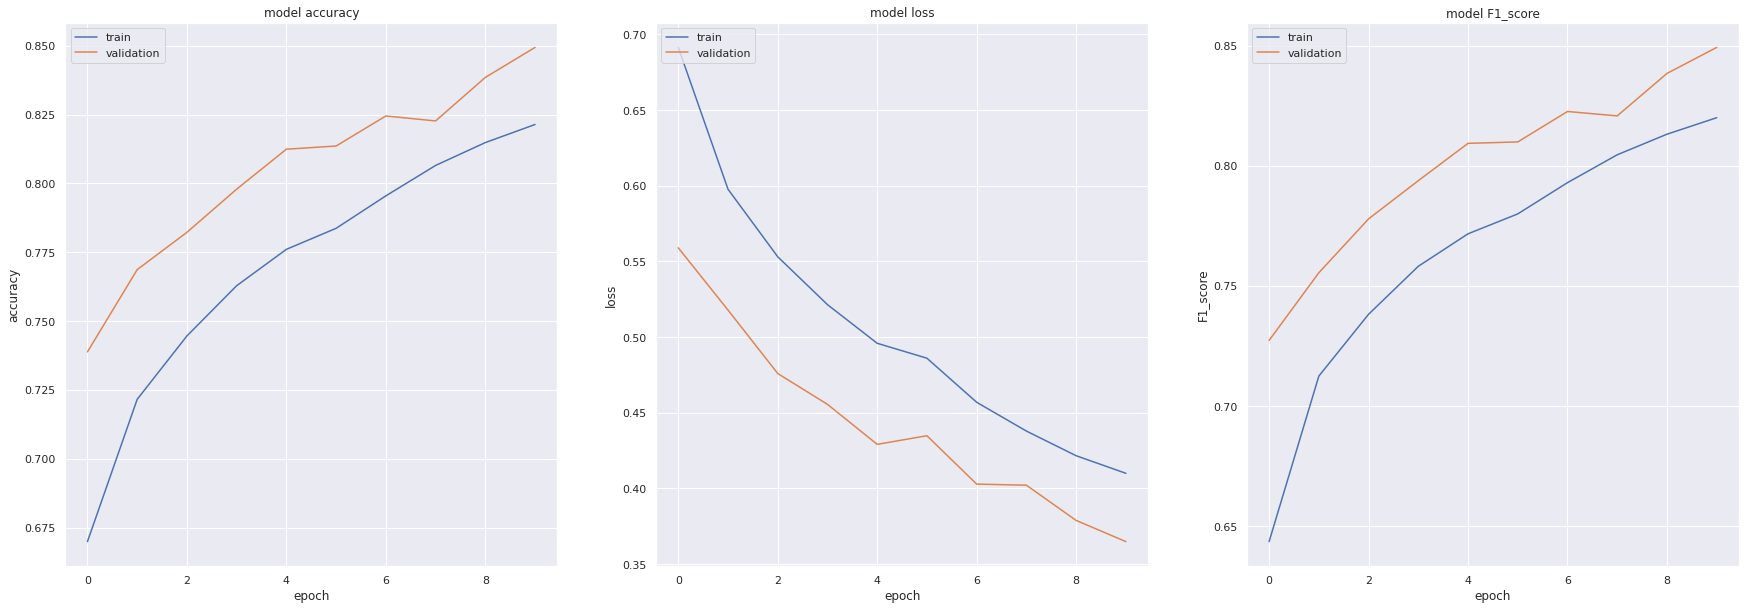

In [120]:
# list all data in history
plt.figure(figsize=(30,10))
print(history_bilstm.history.keys())
# summarize history for accuracy
plt.subplot(131)
plt.plot(history_bilstm.history['acc'])
plt.plot(history_bilstm.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(132)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(133)
plt.plot(history_bilstm.history["f1_m"])
plt.plot(history_bilstm.history["val_f1_m"])
plt.title('model F1_score')
plt.ylabel('F1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

$\underline{{\color{blue}{\large \textbf{Evaluation}}}}$

In [121]:
print("test errors")
predictions_test = model_bilstm.predict(xtest_pad)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.7581273804913623
accuracy: 0.756 


In [122]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.72      0.77      0.74      1358
     neutral       0.97      0.65      0.78      1235
    positive       0.69      0.84      0.76      1396

    accuracy                           0.76      3989
   macro avg       0.79      0.75      0.76      3989
weighted avg       0.79      0.76      0.76      3989



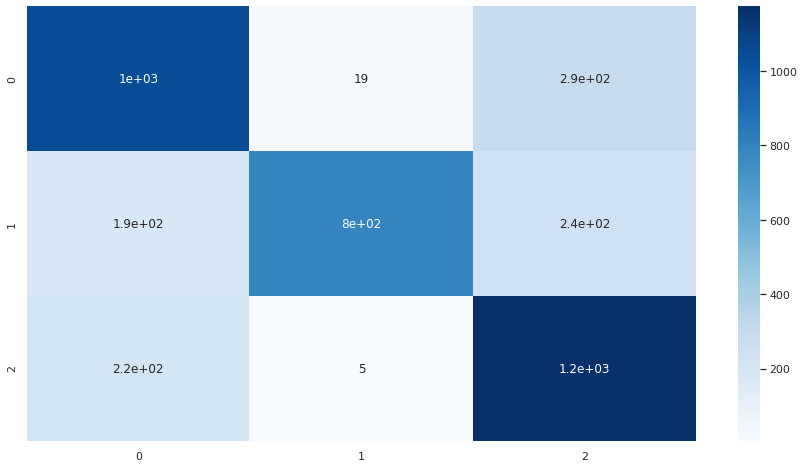

In [123]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="Blues")

### $\underline{{\color{red}{2}}-{\color{blue}{4)}}~GRU}$

Lets try two layers of GRU:

In [124]:
# GRU with glove embeddings and two dense layers
model_gru = Sequential()
model_gru.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model_gru.add(SpatialDropout1D(0.3))
model_gru.add(GRU(300, dropout=0.3, recurrent_dropout=0.3))


model_gru.add(Dense(1024, activation='relu'))
model_gru.add(Dropout(0.8))

model_gru.add(Dense(1024, activation='relu'))
model_gru.add(Dropout(0.8))

model_gru.add(Dense(3))
model_gru.add(Activation('softmax'))
model_gru.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc',f1_m,precision_m,recall_m])

$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [125]:
# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history_gru=model_gru.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=10, 
          verbose=1, validation_data=(xvalid_pad, yvalid_enc))

Epoch 1/10
273/273 [==============================] - 69s 251ms/step - loss: 0.7180 - acc: 0.6555 - f1_m: 0.6297 - precision_m: 0.6944 - recall_m: 0.5797 - val_loss: 0.5837 - val_acc: 0.7397 - val_f1_m: 0.7179 - val_precision_m: 0.7885 - val_recall_m: 0.6590
Epoch 2/10
273/273 [==============================] - 68s 248ms/step - loss: 0.6114 - acc: 0.7159 - f1_m: 0.7051 - precision_m: 0.7501 - recall_m: 0.6652 - val_loss: 0.5329 - val_acc: 0.7564 - val_f1_m: 0.7422 - val_precision_m: 0.7993 - val_recall_m: 0.6929
Epoch 3/10
273/273 [==============================] - 68s 248ms/step - loss: 0.5727 - acc: 0.7367 - f1_m: 0.7290 - precision_m: 0.7684 - recall_m: 0.6935 - val_loss: 0.5134 - val_acc: 0.7663 - val_f1_m: 0.7535 - val_precision_m: 0.8022 - val_recall_m: 0.7106
Epoch 4/10
273/273 [==============================] - 68s 248ms/step - loss: 0.5403 - acc: 0.7540 - f1_m: 0.7473 - precision_m: 0.7800 - recall_m: 0.7174 - val_loss: 0.4845 - val_acc: 0.7795 - val_f1_m: 0.7691 - val_precisi

dict_keys(['loss', 'acc', 'f1_m', 'precision_m', 'recall_m', 'val_loss', 'val_acc', 'val_f1_m', 'val_precision_m', 'val_recall_m'])


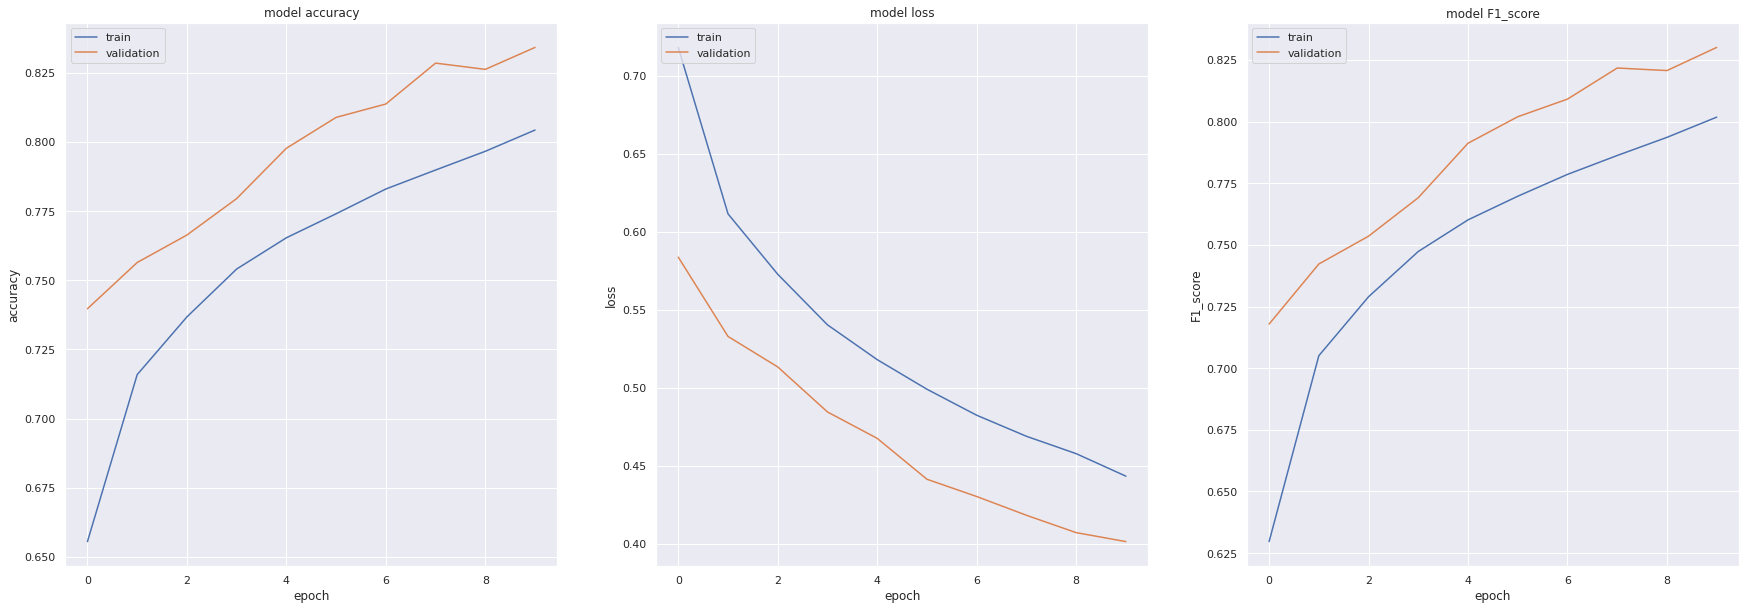

In [126]:
# list all data in history
plt.figure(figsize=(30,10))
print(history_gru.history.keys())
# summarize history for accuracy
plt.subplot(131)
plt.plot(history_gru.history['acc'])
plt.plot(history_gru.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(132)
plt.plot(history_gru.history['loss'])
plt.plot(history_gru.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.subplot(133)
plt.plot(history_gru.history["f1_m"])
plt.plot(history_gru.history["val_f1_m"])
plt.title('model F1_score')
plt.ylabel('F1_score')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

$\underline{{\color{blue}{\large \textbf{Evaluation}}}}$

In [127]:
print("test errors")
predictions_test = model_gru.predict(xtest_pad)
pred_test=[list(predictions_test[i,:]).index(max(predictions_test[i,:])) for i in range(len(predictions_test))]
print ("f_1_score: " ,f1_score(y_test, np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(y_test, np.array(pred_test)))

test errors
f_1_score:  0.7772890804630506
accuracy: 0.773 


In [128]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(y_test, pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.77      0.72      0.75      1358
     neutral       0.96      0.72      0.82      1235
    positive       0.68      0.87      0.76      1396

    accuracy                           0.77      3989
   macro avg       0.80      0.77      0.78      3989
weighted avg       0.80      0.77      0.78      3989



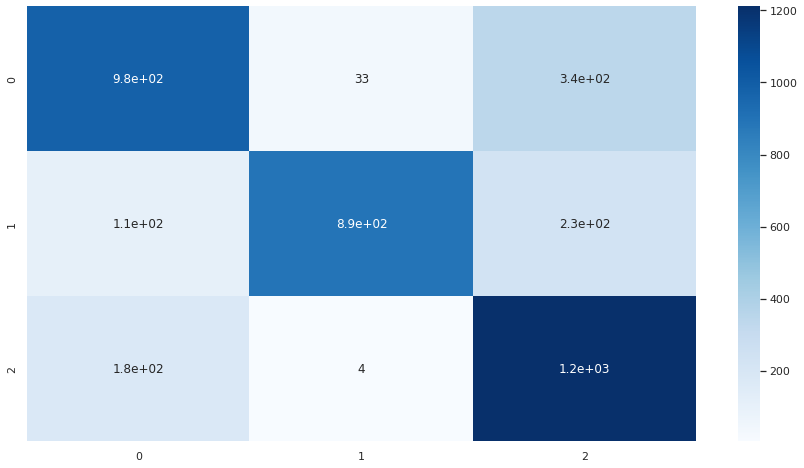

In [129]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, pred_test)), annot=True,cmap="Blues")

### $\underline{{\color{red}{2}}-{\color{blue}{5)}}~Transformers:XLM,XLNET,ALBERTA,ROBERTA,DISTLBERT,BERT}$

In [130]:
%%bash
pip install -q transformers

In [131]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path 
import os
import torch
import torch.optim as optim
import random 
# fastai
from fastai import *
from fastai.text import *
from fastai.callbacks import *
# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig
from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig

In [132]:
import fastai
import transformers
print('fastai version :', fastai.__version__)
print('transformers version :', transformers.__version__)

fastai version : 1.0.61
transformers version : 3.1.0


${\color{blue}{\large Main~transformers~classes}}$

In transformers, each model architecture is associated with 3 main types of classes:

* A model class to load/store a particular pre-train model.
* A tokenizer class to pre-process the data and make it compatible with a particular model.


* A configuration class to load/store the configuration of a particular model.
For example, if you want to use the Bert architecture for text classification, you would use BertForSequenceClassification for the model class, BertTokenizer for the tokenizer class and BertConfig for the configuration class. 

In order to switch easily between classes  -  each related to a specific model type  -  I created a dictionary that allows loading the correct classes by just specifying the correct model type name.

In [133]:
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'xlnet': (XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig),
    'xlm': (XLMForSequenceClassification, XLMTokenizer, XLMConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig),
    'distilbert': (DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig)
}

You will see later, that those classes share a common class method from_pretrained(pretrained_model_name, ...). In our case, the parameter pretrained_model_name is a string with the shortcut name of a pre-trained model/tokenizer/configuration to load, e.g 'bert-base-uncased'. 

In [134]:
# Parameters
seed = 42
use_fp16 = False
bs = 16

#model_type = 'roberta'
#pretrained_model_name = 'roberta-base'

# model_type = 'bert'
# pretrained_model_name='bert-base-uncased'

# model_type = 'distilbert'
# pretrained_model_name = 'distilbert-base-uncased'

#model_type = 'xlm'
#pretrained_model_name = 'xlm-clm-enfr-1024'

model_type = 'xlnet'
pretrained_model_name = 'xlnet-base-cased'

In [135]:
model_class, tokenizer_class, config_class = MODEL_CLASSES[model_type]

It is worth noting that in this case, we use the transformers library only for a multi-class text classification task. For that reason, this notebook integrates only the transformer architectures that have a model for sequence classification implemented. These model types are :

$\underline{{\color{blue}{BERT~(from~Google)}}}$ : This will be implemented in an other notebook

$\underline{{\color{blue}{XLNet~(from~Google/CMU)}}}$

$\underline{{\color{blue}{XLM~(from~Facebook)}}}$

$\underline{{\color{blue}{RoBERTa~(from~Facebook)}}}$

$\underline{{\color{blue}{DistilBERT~(from~HuggingFace)}}}$


$\underline{{\color{red}{\huge Util~function}}}$

In [136]:
def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False
seed_all(seed)        

$\underline{{\color{red}{\huge Data~pre-processing}}}$ 

To match pre-training, we have to format the model input sequence in a specific format. To do so, you have to first tokenize and then numericalize the texts correctly. The difficulty here is that each pre-trained model, that we will fine-tune, requires exactly the same specific pre-process - tokenization & numericalization - than the pre-process used during the pre-train part. Fortunately, the tokenizer class from transformers provides the correct pre-process tools that correspond to each pre-trained model.

In the fastai library, data pre-processing is done automatically during the creation of the DataBunch. As you will see in the DataBunch implementation, the tokenizer and numericalizer are passed in the processor argument under the following format :

processor = [TokenizeProcessor(tokenizer=tokenizer,...), NumericalizeProcessor(vocab=vocab,...)]

Let's first analyse how we can integrate the transformers tokenizer within the TokenizeProcessor function.

$\underline{{\color{green}{\large Custom~Tokenizer}}}$

This part can be a little bit confusing because a lot of classes are wrapped in each other and with similar names. To resume, if we look attentively at the fastai implementation, we notice that :

* The TokenizeProcessor object takes as tokenizer argument a Tokenizer object.
* The Tokenizer object takes as tok_func argument a BaseTokenizer object.
* The BaseTokenizer object implement the function tokenizer(t:str) → List[str] that take a text t and returns the list of its tokens.

Therefore, we can simply create a new class TransformersBaseTokenizer that inherits from BaseTokenizer and overwrite a new tokenizer function.



In [137]:
class TransformersBaseTokenizer(BaseTokenizer):
    """Wrapper around PreTrainedTokenizer to be compatible with fast.ai"""
    def __init__(self, pretrained_tokenizer: PreTrainedTokenizer, model_type = 'bert', **kwargs):
        self._pretrained_tokenizer = pretrained_tokenizer
        self.max_seq_len = pretrained_tokenizer.max_len
        self.model_type = model_type

    def __call__(self, *args, **kwargs): 
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length and add the spesial tokens"""
        CLS = self._pretrained_tokenizer.cls_token
        SEP = self._pretrained_tokenizer.sep_token
        if self.model_type in ['roberta']:
            tokens = self._pretrained_tokenizer.tokenize(t, add_prefix_space=True)[:self.max_seq_len - 2]
            tokens = [CLS] + tokens + [SEP]
        else:
            tokens = self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2]
            if self.model_type in ['xlnet']:
                tokens = tokens + [SEP] +  [CLS]
            else:
                tokens = [CLS] + tokens + [SEP]
        return tokens

In [138]:
transformer_tokenizer = tokenizer_class.from_pretrained(pretrained_model_name)
transformer_base_tokenizer = TransformersBaseTokenizer(pretrained_tokenizer = transformer_tokenizer, model_type = model_type)
fastai_tokenizer = Tokenizer(tok_func = transformer_base_tokenizer, pre_rules=[], post_rules=[])

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1321: FutureWarning:

The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.



In this implementation, we need to be about 3 things :

* As we are not using RNN, we have to limit the sequence length to the model input size.
* Most of the models require special tokens placed at the beginning and end of the sequences.
* Some models like RoBERTa require a space to start the input string. For those models, the encoding methods should be called with add_prefix_space set to True.

* $\underline{{\color{green}{bert}}}$:       [CLS] + tokens + [SEP] + padding

* $\underline{{\color{green}{roberta}}}$:    [CLS] + prefix_space + tokens + [SEP] + padding

* $\underline{{\color{green}{distilbert}}}$: [CLS] + tokens + [SEP] + padding

* $\underline{{\color{green}{xlm}}}$:        [CLS] + tokens + [SEP] + padding

* $\underline{{\color{green}{xlnet}}}$:      padding + tokens + [SEP] + [CLS]

It is worth noting that we don't add padding in this part of the implementation.  As we will see later, fastai manage it automatically during the creation of the DataBunch.


${\color{red}{\large Custom~Numericalizer}}$

In fastai, NumericalizeProcessor object takes as vocab argument a Vocab object. From this analyse, we suggest two ways to adapt the fastai numericalizer:

* Create a new class TransformersVocab that inherits from Vocab and overwrite numericalize and textify functions.

Even if the first solution seems to be simpler, Transformers does not provide, for all models, a straightforward way to retreive his list of tokens. Therefore, I implemented the second solution, which runs for each model type. It consists of using the functions convert_tokens_to_ids and convert_ids_to_tokens in respectively numericalize and textify.

In [139]:
class TransformersVocab(Vocab):
    def __init__(self, tokenizer: PreTrainedTokenizer):
        super(TransformersVocab, self).__init__(itos = [])
        self.tokenizer = tokenizer
    
    def numericalize(self, t:Collection[str]) -> List[int]:
        "Convert a list of tokens `t` to their ids."
        return self.tokenizer.convert_tokens_to_ids(t)
        #return self.tokenizer.encode(t)

    def textify(self, nums:Collection[int], sep=' ') -> List[str]:
        "Convert a list of `nums` to their tokens."
        nums = np.array(nums).tolist()
        return sep.join(self.tokenizer.convert_ids_to_tokens(nums)) if sep is not None else self.tokenizer.convert_ids_to_tokens(nums)
    
    def __getstate__(self):
        return {'itos':self.itos, 'tokenizer':self.tokenizer}

    def __setstate__(self, state:dict):
        self.itos = state['itos']
        self.tokenizer = state['tokenizer']
        self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})

${\color{red}{Custom~processor}}$

Now that we have our custom tokenizer and numericalizer, we can create the custom processor. Notice we are passing the include_bos = False and include_eos = False options. This is because fastai adds its own special tokens by default which interferes with the [CLS] and [SEP] tokens added by our custom tokenizer.

In [140]:
transformer_vocab =  TransformersVocab(tokenizer = transformer_tokenizer)
numericalize_processor = NumericalizeProcessor(vocab=transformer_vocab)

tokenize_processor = TokenizeProcessor(tokenizer=fastai_tokenizer, include_bos=False, include_eos=False)

transformer_processor = [tokenize_processor, numericalize_processor]

Setting up the Databunch
For the DataBunch creation, you have to pay attention to set the processor argument to our new custom processor $\boxed{transformer\_processor}$ and manage correctly the padding.

As mentioned in the HuggingFace documentation, BERT, RoBERTa, XLM and DistilBERT are models with absolute position embeddings, so it's usually advised to pad the inputs on the right rather than the left. Regarding XLNET, it is a model with relative position embeddings, therefore, you can either pad the inputs on the right or on the left.

In [141]:
pad_first = bool(model_type in ['xlnet'])
pad_idx = transformer_tokenizer.pad_token_id

In [142]:
tokens = transformer_tokenizer.tokenize('Hello it s me, Iam Sofien RESIFI')
print(tokens)
ids = transformer_tokenizer.convert_tokens_to_ids(tokens)
print(ids)
transformer_tokenizer.convert_ids_to_tokens(ids)

['▁', 'Hello', '▁it', '▁', 's', '▁me', ',', '▁I', 'am', '▁So', 'fi', 'en', '▁', 'RES', 'IF', 'I']
[17, 11368, 36, 17, 23, 110, 19, 35, 1199, 346, 2265, 254, 17, 16402, 8243, 96]


['▁',
 'Hello',
 '▁it',
 '▁',
 's',
 '▁me',
 ',',
 '▁I',
 'am',
 '▁So',
 'fi',
 'en',
 '▁',
 'RES',
 'IF',
 'I']

There is multible ways to create a DataBunch, in our implementation, we use the data block API, which gives more flexibility.

In [143]:
lbl_enc_train = preprocessing.LabelEncoder()
Train['Sentiment']= lbl_enc_train.fit_transform(Train['Sentiment'].values)
lbl_enc_test = preprocessing.LabelEncoder()
Test['Sentiment']= lbl_enc_test.fit_transform(Test['Sentiment'].values)

In [144]:
databunch = (TextList.from_df(Train, cols='text', processor=transformer_processor)
             .split_by_rand_pct(0.1,seed=seed)
             .label_from_df(cols= 'Sentiment')
             .add_test(Test['text'])
             .databunch(bs=bs, pad_first=pad_first, pad_idx=pad_idx))

In [145]:
print('[CLS] token :', transformer_tokenizer.cls_token)
print('[SEP] token :', transformer_tokenizer.sep_token)
print('[PAD] token :', transformer_tokenizer.pad_token)
databunch.show_batch()

[CLS] token : <cls>
[SEP] token : <sep>
[PAD] token : <pad>


/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning:

This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)



text,target
▁self info ▁2 e <unk> e ▁ <unk> ▁ e ° <unk> e ° <unk> i <unk> ▁ i ▁ e ° <unk> i ▁ i ▁ e ° <unk> e ° <unk> i <unk> ▁ e <unk> 1 ⁄ 4 ▁ e <unk> e <unk> e <unk> e <unk> ▁ i <unk> i <unk> ▁ i <unk> i <unk> e ▁ <unk> e 3 ▁ i <unk> e 2,2
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>,1
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>,1
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>,1
<pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad>,0


In [146]:
print('[CLS] id :', transformer_tokenizer.cls_token_id)
print('[SEP] id :', transformer_tokenizer.sep_token_id)
print('[PAD] id :', pad_idx)
test_one_batch = databunch.one_batch()[0]
print('Batch shape : ',test_one_batch.shape)
print(test_one_batch)

[CLS] id : 3
[SEP] id : 4
[PAD] id : 5
Batch shape :  torch.Size([16, 210])
tensor([[ 1080, 26129,   159,  ...,     0,     4,     3],
        [    5,     5,     5,  ...,   627,     4,     3],
        [    5,     5,     5,  ..., 18490,     4,     3],
        ...,
        [    5,     5,     5,  ...,   601,     4,     3],
        [    5,     5,     5,  ..., 12804,     4,     3],
        [    5,     5,     5,  ...,  9817,     4,     3]])


${\color{red}{Custom~model}}$

As mentioned here, every model's forward method always outputs a tuple with various elements depending on the model and the configuration parameters. In our case, we are interested to access only to the logits.  One way to access them is to create a custom model.

In [147]:
# defining our model architecture 
class CustomTransformerModel(nn.Module):
    def __init__(self, transformer_model: PreTrainedModel):
        super(CustomTransformerModel,self).__init__()
        self.transformer = transformer_model
        
    def forward(self, input_ids, attention_mask=None):
        
        # attention_mask
        # Mask to avoid performing attention on padding token indices.
        # Mask values selected in ``[0, 1]``:
        # ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        attention_mask = (input_ids!=pad_idx).type(input_ids.type()) 
        
        logits = self.transformer(input_ids,
                                  attention_mask = attention_mask)[0]   
        return logits

To make our transformers adapted to multiclass classification, before loading the pre-trained model, we need to precise the number of labels. To do so, you can modify the config instance 

In [148]:
config = config_class.from_pretrained(pretrained_model_name)
config.num_labels = 3
config.use_bfloat16 = use_fp16
print(config)


XLNetConfig {
  "architectures": [
    "XLNetLMHeadModel"
  ],
  "attn_type": "bi",
  "bi_data": false,
  "bos_token_id": 1,
  "clamp_len": -1,
  "d_head": 64,
  "d_inner": 3072,
  "d_model": 768,
  "dropout": 0.1,
  "end_n_top": 5,
  "eos_token_id": 2,
  "ff_activation": "gelu",
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2
  },
  "layer_norm_eps": 1e-12,
  "mem_len": null,
  "model_type": "xlnet",
  "n_head": 12,
  "n_layer": 12,
  "pad_token_id": 5,
  "reuse_len": null,
  "same_length": false,
  "start_n_top": 5,
  "summary_activation": "tanh",
  "summary_last_dropout": 0.1,
  "summary_type": "last",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 250
    }
  },
  "untie_r": true,
  "vocab_size": 32000
}



/usr/local/lib/python3.6/dist-packages/transformers/configuration_xlnet.py:211: FutureWarning:

This config doesn't use attention memories, a core feature of XLNet. Consider setting `men_len` to a non-zero value, for example `xlnet = XLNetLMHeadModel.from_pretrained('xlnet-base-cased'', mem_len=1024)`, for accurate training performance as well as an order of magnitude faster inference. Starting from version 3.5.0, the default parameter will be 1024, following the implementation in https://arxiv.org/abs/1906.08237



In [149]:
transformer_model = model_class.from_pretrained(pretrained_model_name, config = config)
# transformer_model = model_class.from_pretrained(pretrained_model_name, num_labels = 5)

custom_transformer_model = CustomTransformerModel(transformer_model = transformer_model)

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.weight', 'sequence_summary.summary.bias', 'logits_proj.weight', 'logits_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

${\color{red}{Learner~:~Custom~Optimizer~/~Custom~Metric}}$

In pytorch-transformers, HuggingFace had implemented two specific optimizers  -  BertAdam and OpenAIAdam  -  that have been replaced by a single AdamW optimizer. This optimizer matches Pytorch Adam optimizer Api, therefore, it becomes straightforward to integrate it within fastai. It is worth noting that for reproducing BertAdam specific behavior, you have to set correct_bias = False.

In [150]:
from fastai.callbacks import *
from transformers import AdamW
from functools import partial

CustomAdamW = partial(AdamW, correct_bias=False)

learner = Learner(databunch, 
                  custom_transformer_model, 
                  opt_func = CustomAdamW, 
                  metrics=[accuracy, error_rate])

# Show graph of learner stats and metrics after each epoch.
learner.callbacks.append(ShowGraph(learner))

# Put learn in FP16 precision mode. --> Seems to not working
if use_fp16: learner = learner.to_fp16()

${\color{red}{Discriminative~Fine-tuning~and~Gradual~unfreezing~(Optional)}}$

To use discriminative layer training and gradual unfreezing, fastai provides one tool that allows to "split" the structure model into groups. An instruction to perform that "split" is described in the fastai documentation here.

Unfortunately, the model architectures are too different to create a unique generic function that can "split" all the model types in a convenient way. Thereby, you will have to implement a custom "split" for each different model architecture.

For example, if we use the RobBERTa model and that we observe his architecture by making print(learner.model).

We can decide to divide the model in 14 blocks :

* 1 Embedding
* 12 transformer
* 1 classifier

In this case, we can split our model in this way :

In [151]:
# For DistilBERT
# list_layers = [learner.model.transformer.distilbert.embeddings,
#                learner.model.transformer.distilbert.transformer.layer[0],
#                learner.model.transformer.distilbert.transformer.layer[1],
#                learner.model.transformer.distilbert.transformer.layer[2],
#                learner.model.transformer.distilbert.transformer.layer[3],
#                learner.model.transformer.distilbert.transformer.layer[4],
#                learner.model.transformer.distilbert.transformer.layer[5],
#                learner.model.transformer.pre_classifier]

# For xlnet-base-cased
list_layers = [learner.model.transformer.transformer.word_embedding,
               learner.model.transformer.transformer.layer[0],
               learner.model.transformer.transformer.layer[1],
               learner.model.transformer.transformer.layer[2],
               learner.model.transformer.transformer.layer[3],
               learner.model.transformer.transformer.layer[4],
               learner.model.transformer.transformer.layer[5],
               learner.model.transformer.transformer.layer[6],
               learner.model.transformer.transformer.layer[7],
               learner.model.transformer.transformer.layer[8],
               learner.model.transformer.transformer.layer[9],
               learner.model.transformer.transformer.layer[10],
               learner.model.transformer.transformer.layer[11],
               learner.model.transformer.sequence_summary]

# For roberta-base
"""list_layers = [learner.model.transformer.roberta.embeddings,
              learner.model.transformer.roberta.encoder.layer[0],
              learner.model.transformer.roberta.encoder.layer[1],
              learner.model.transformer.roberta.encoder.layer[2],
              learner.model.transformer.roberta.encoder.layer[3],
              learner.model.transformer.roberta.encoder.layer[4],
              learner.model.transformer.roberta.encoder.layer[5],
              learner.model.transformer.roberta.encoder.layer[6],
              learner.model.transformer.roberta.encoder.layer[7],
              learner.model.transformer.roberta.encoder.layer[8],
              learner.model.transformer.roberta.encoder.layer[9],
              learner.model.transformer.roberta.encoder.layer[10],
              learner.model.transformer.roberta.encoder.layer[11],
              learner.model.transformer.roberta.pooler]"""

'list_layers = [learner.model.transformer.roberta.embeddings,\n              learner.model.transformer.roberta.encoder.layer[0],\n              learner.model.transformer.roberta.encoder.layer[1],\n              learner.model.transformer.roberta.encoder.layer[2],\n              learner.model.transformer.roberta.encoder.layer[3],\n              learner.model.transformer.roberta.encoder.layer[4],\n              learner.model.transformer.roberta.encoder.layer[5],\n              learner.model.transformer.roberta.encoder.layer[6],\n              learner.model.transformer.roberta.encoder.layer[7],\n              learner.model.transformer.roberta.encoder.layer[8],\n              learner.model.transformer.roberta.encoder.layer[9],\n              learner.model.transformer.roberta.encoder.layer[10],\n              learner.model.transformer.roberta.encoder.layer[11],\n              learner.model.transformer.roberta.pooler]'

In [152]:
learner.split(list_layers)
num_groups = len(learner.layer_groups)
print('Learner split in',num_groups,'groups')
print(learner.layer_groups)

Learner split in 14 groups
[Sequential(
  (0): Embedding(32000, 768)
), Sequential(
  (0): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (1): Dropout(p=0.1, inplace=False)
  (2): ParameterModule()
  (3): ParameterModule()
  (4): ParameterModule()
  (5): ParameterModule()
  (6): ParameterModule()
  (7): ParameterModule()
  (8): ParameterModule()
  (9): ParameterModule()
  (10): ParameterModule()
  (11): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (12): Linear(in_features=768, out_features=3072, bias=True)
  (13): Linear(in_features=3072, out_features=768, bias=True)
  (14): Dropout(p=0.1, inplace=False)
  (15): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
  (1): Dropout(p=0.1, inplace=False)
  (2): ParameterModule()
  (3): ParameterModule()
  (4): ParameterModule()
  (5): ParameterModule()
  (6): ParameterModule()
  (7): ParameterModule()
  (8): ParameterModule()
  (9): ParameterModule()
  (10): Parameter

$\underline{{\color{blue}{\large \textbf{Training the model}}}}$

In [153]:
learner.save('untrain')

In [154]:
seed_all(seed)
learner.load('untrain');

In [155]:
learner.freeze_to(-1)

In [156]:
learner.summary()

CustomTransformerModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [1, 768]             24,576,000 False     
______________________________________________________________________
LayerNorm            [1, 768]             1,536      False     
______________________________________________________________________
Dropout              [1, 768]             0          False     
______________________________________________________________________
LayerNorm            [1, 768]             1,536      False     
______________________________________________________________________
Linear               [1, 3072]            2,362,368  False     
______________________________________________________________________
Linear               [1, 768]             2,360,064  False     
______________________________________________________________________
Dropout              [1, 768]             0          False     
_______________________________________

In [157]:
learner.lr_find()

epoch,train_loss,valid_loss,accuracy,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 2.75E-06
Min loss divided by 10: 5.75E-07


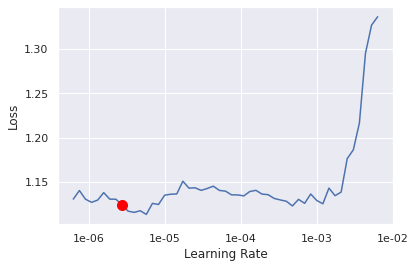

In [158]:
learner.recorder.plot(skip_end=10,suggestion=True)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.895258,0.795285,0.620129,0.379871,03:57


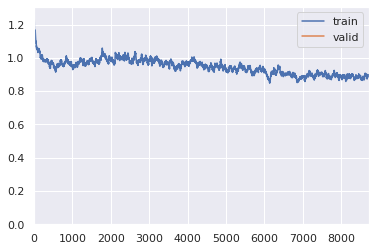

In [159]:
learner.fit_one_cycle(1,max_lr=1e-03,moms=(0.8,0.7))

In [160]:
learner.save('first_cycle')

In [161]:
seed_all(seed)
learner.load('first_cycle');

In [162]:
learner.freeze_to(-2)

In [163]:
lr = 1e-5

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.764494,0.641279,0.684774,0.315226,04:38


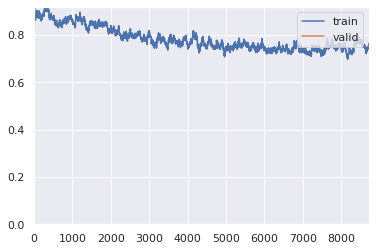

In [164]:
learner.fit_one_cycle(1, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

In [165]:
learner.save('second_cycle')

In [166]:
seed_all(seed)
learner.load('second_cycle');

In [167]:
learner.freeze_to(-3)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.699273,0.583509,0.721161,0.278839,05:42


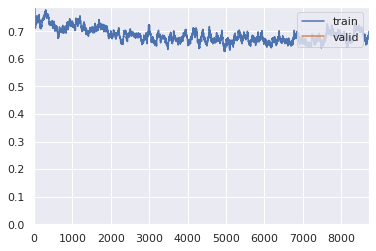

In [168]:
learner.fit_one_cycle(1, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

In [169]:
learner.save('third_cycle')

In [170]:
seed_all(seed)
learner.load('third_cycle');

In [171]:
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.427220,0.420033,0.819097,0.180903,12:50
1,0.393600,0.356566,0.848000,0.152000,12:36


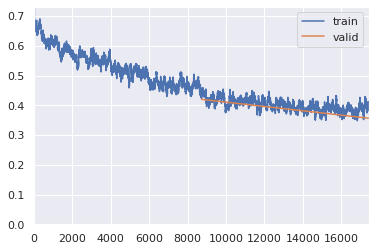

In [172]:
learner.fit_one_cycle(2, max_lr=slice(lr*0.95**num_groups, lr), moms=(0.8, 0.9))

${\color{blue}{Creating~prediction}}$

Now that the model is trained, we want to generate predictions from the test dataset.

As specified in Keita Kurita's article, as the function get_preds does not return elements in order by default, you will have to resort the elements into their correct order.

In [173]:
def get_preds_as_nparray(ds_type) -> np.ndarray:
    """
    the get_preds method does not yield the elements in order by default
    we borrow the code from the RNNLearner to resort the elements into their correct order
    """
    preds = learner.get_preds(ds_type)[0].detach().cpu().numpy()
    sampler = [i for i in databunch.dl(ds_type).sampler]
    reverse_sampler = np.argsort(sampler)
    return preds[reverse_sampler, :]

test_preds = get_preds_as_nparray(DatasetType.Test)

${\color{blue}{\large \textbf{Evaluation}}}$

In [174]:
print("test errors")
pred_test=[list(test_preds[i,:]).index(max(test_preds[i,:])) for i in range(len(test_preds))]
print ("f_1_score: " ,f1_score(Test['Sentiment'], np.array(pred_test),average='macro'))
print ("accuracy: %0.3f " % accuracy_score(Test['Sentiment'], np.array(pred_test)))

test errors
f_1_score:  0.8474624127664696
accuracy: 0.844 


In [175]:
from sklearn.metrics import classification_report
target_names = ['negative', 'neutral', 'positive']
print(classification_report(Test['Sentiment'], pred_test, target_names=target_names))

              precision    recall  f1-score   support

    negative       0.77      0.78      0.78      1358
     neutral       0.94      0.95      0.95      1235
    positive       0.83      0.80      0.82      1396

    accuracy                           0.84      3989
   macro avg       0.85      0.85      0.85      3989
weighted avg       0.84      0.84      0.84      3989



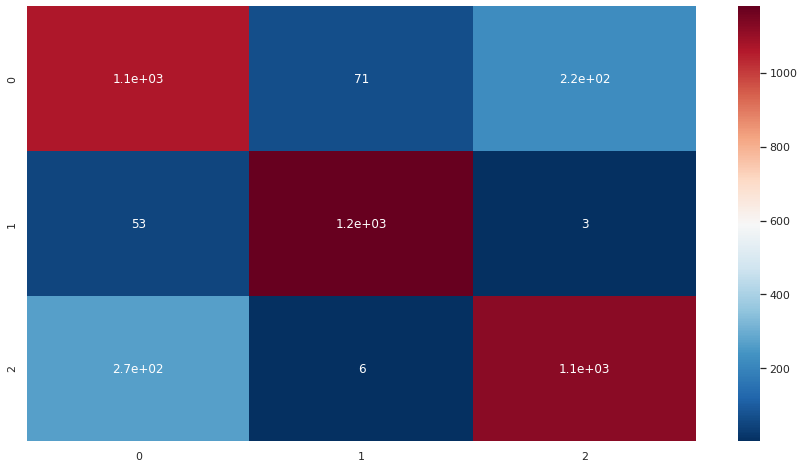

In [176]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(confusion_matrix(Test['Sentiment'], pred_test)), annot=True,cmap="RdBu_r")

### $\underline{{\color{red}{2}}-{\color{blue}{6)}}~DEMO}$

In [177]:
!pip install googletrans
#clear_output()
import googletrans                       #This package will be necessary for the translation
from googletrans import Translator

In [178]:
translator = Translator()
def Translate(chaine):
  return   translator.translate(chaine,src='fr', dest='en').text

In [179]:
sentence_input="Bonjour Monsieur le CEO, le travil fait la semaine derniére était á la hauteur, je vous remercie pour ça."
sentence_translated=Translate(sentence_input)

$\underline{{\color{blue}{Machine~learnig~algorithms}}}$

In [181]:
sentence_tfv=tfv.transform([sentence_translated])
sentence_ctv=ctv.transform([sentence_translated])

$\underline{{\color{red}{Logisitc~regression}}}$

In [182]:
res=clf_LR_ctv.predict(sentence_ctv)[0]
if res==0:
  print("negative avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res])
elif res==1:
  print("neutre avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res])
else:
  print("positive avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res]) 

positive avec une probabilité de  0.8294128919388619


$\underline{{\color{red}{Naive~Bayes}}}$

In [183]:
res=clf_nb_ctv.predict(sentence_ctv)[0]
if res==0:
  print("negative avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res])
elif res==1:
  print("neutre avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res])
else:
  print("positive avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res]) 

positive avec une probabilité de  0.9999818309938882


$\underline{{\color{blue}{Deep~Leaning}}}$

$\underline{{\color{red}{LSTM}}}$

In [184]:
np.array(sent2vec(sentence_translated).tolist())
nn=model_nn.predict(sent2vec("luv ya for that").reshape(1,300))

In [185]:
sent_pad=token.texts_to_sequences([sentence_translated])
sent_pad_seq=sequence.pad_sequences(sent_pad,maxlen=max_len)

In [186]:
res=model_lstm.predict(sent_pad_seq).tolist()[0]
ind=res.index(max(res))
if ind==0:
  print("negative avec une probabilité de ",res[ind])
elif ind==1:
  print("neutre avec une probabilité de ",res[ind])
else:
  print("positive avec une probabilité de ",res[ind]) 

positive avec une probabilité de  0.9884347915649414


$\underline{{\color{red}{BiLSTM}}}$

In [187]:
res=model_bilstm.predict(sent_pad_seq).tolist()[0]
ind=res.index(max(res))
if ind==0:
  print("negative avec une probabilité de ",res[ind])
elif ind==1:
  print("neutre avec une probabilité de ",res[ind])
else:
  print("positive avec une probabilité de ",res[ind]) 

positive avec une probabilité de  0.8470814824104309


$\underline{{\color{red}{GRU}}}$

In [188]:
res=model_gru.predict(sent_pad_seq).tolist()[0]
ind=res.index(max(res))
if ind==0:
  print("negative avec une probabilité de ",res[ind])
elif ind==1:
  print("neutre avec une probabilité de ",res[ind])
else:
  print("positive avec une probabilité de ",res[ind]) 

positive avec une probabilité de  0.8966262340545654


$\underline{{\color{blue}{Bert~family}}}$

In [189]:
ind=learner.predict(sentence_translated)[2].tolist().index(max(learner.predict(sentence_translated)[2].tolist()))
if ind==0.0:
  print("negative",learner.predict(sentence_translated)[2].tolist()[ind])
elif ind==1.0:
  print("neutral",learner.predict(sentence_translated)[2].tolist()[ind])
else :
  print("positive",learner.predict(sentence_translated)[2].tolist()[ind])

positive 0.948239803314209


In [190]:
sentence_input="Bonjour Monsieur le CEO, le travil reçu le mois dernier est n'est pas acceptable, on attendait plus que ça de votre part"
sentence_translated=Translate(sentence_input)
print(sentence_translated)

Hello Mr. CEO, the work received last month is not acceptable, we expected more than that from you


$\underline{{\color{blue}{Machine~learnig~algorithms}}}$

In [191]:
sentence_tfv=tfv.transform([sentence_translated])
sentence_ctv=ctv.transform([sentence_translated])

$\underline{{\color{red}{Logisitc~regression}}}$

In [192]:
res=clf_LR_ctv.predict(sentence_ctv)[0]
if res==0:
  print("negative avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res])
elif res==1:
  print("neutre avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res])
else:
  print("positive avec une probabilité de ",clf_LR_tfv.predict_proba(sentence_tfv)[0][res]) 

positive avec une probabilité de  0.45063035151574143


$\underline{{\color{red}{Naive~Bayes}}}$

In [193]:
res=clf_nb_ctv.predict(sentence_ctv)[0]
if res==0:
  print("negative avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res])
elif res==1:
  print("neutre avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res])
else:
  print("positive avec une probabilité de ",clf_nb_ctv.predict_proba(sentence_ctv)[0][res]) 

positive avec une probabilité de  0.9346749213025759


$\underline{{\color{blue}{Deep~learning}}}$

$\underline{{\color{red}{LSTM}}}$

In [194]:
sent_pad=token.texts_to_sequences([sentence_translated])
sent_pad_seq=sequence.pad_sequences(sent_pad,maxlen=max_len)

In [195]:
res=model_lstm.predict(sent_pad_seq).tolist()[0]
ind=res.index(max(res))
if ind==0:
  print("negative avec une probabilité de ",res[ind])
elif ind==1:
  print("neutre avec une probabilité de ",res[ind])
else:
  print("positive avec une probabilité de ",res[ind]) 

positive avec une probabilité de  0.7258933782577515


$\underline{{\color{blue}{BERT family:Albert}}}$

In [196]:
ind=learner.predict(sentence_translated)[2].tolist().index(max(learner.predict(sentence_translated)[2].tolist()))
if ind==0.0:
  print("negative",learner.predict(sentence_translated)[2].tolist()[ind])
elif ind==1.0:
  print("neutral",learner.predict(sentence_translated)[2].tolist()[ind])
else :
  print("positive",learner.predict(sentence_translated)[2].tolist()[ind])

negative 0.9234917759895325


# $~{\color{green}{VI}})\underline{Conclusion}$

So after this work our conclusion is that the BERt family algorithms is the best approach which we are going in the packaging later, but in order to do so we need to create a nootebook only for BERT because it needs some e